# How to Use the QS_table (Examples) 

In [ ]:
# Load python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker
import xarray as xr
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import time
from datetime import datetime
from matplotlib.path import Path
from scipy.io import savemat
from scipy.io import loadmat
from scipy.signal import convolve2d
from scipy import ndimage
from scipy.stats import rankdata
import multiprocessing
import os.path
import calendar

# Created files:
import QS_functions as fm
# !!! IMPORT QS_setup !

In [ ]:
# Load df_QS.txt
data = ...


df_QS

In [85]:
# Check for QS IDs (row with columns_c == 1.0) and how many definitions it fulfills
# Identify columns ending with '_c'
c_columns = [col for col in df_QS.columns if col.endswith('_c')]

# Initialize dictionaries to store the results based on the number of columns with 1.0
one_column = []
two_columns = []
three_columns = []
four_columns = []
all_columns = []
none_columns = []

# Loop through each unique 'id'
for unique_id in df_QS['id'].unique():
    id_data = df_QS[df_QS['id'] == unique_id]
    # Check which '_c' columns have a value of 1.0 for that id
    columns_with_1 = id_data[c_columns].apply(lambda x: x == 1.0).any(axis=0)
    # Count how many columns have a 1.0 value
    count_1 = columns_with_1.sum()
    
    # Categorize the id based on the number of columns with 1.0
    if count_1 == 0:
        none_columns.append(unique_id)
    elif count_1 == 1:
        one_column.append(unique_id)
    elif count_1 == 2:
        two_columns.append(unique_id)
    elif count_1 == 3:
        three_columns.append(unique_id)
    elif count_1 == 4:
        four_columns.append(unique_id)
    elif count_1 == len(c_columns):
        all_columns.append(unique_id)


In [86]:
# Result arrays "how many definitions does ID fulfill"
# none_columns
# one_column
# two_columns
# three_columns
# four_columns
# all_columns

In [87]:
# Check for shared IDs among different definitions
QS = df_QS

m1 = QS[QS['FT_MED_VEL_c'] == 1].id.unique()
m2 = QS[QS['FT_TOT_DIST_c'] == 1].id.unique()
m3 = QS[QS['AT_12h_DIST_c'] == 1].id.unique()
m4 = QS[QS['AT_RAD_DIST_c'] == 1].id.unique()
m5 = QS[QS['AT_CIRCLE_DIST_c'] == 1].id.unique()

# Find intersection-IDs
m1m2 = np.intersect1d(m1, m2); m1m3 = np.intersect1d(m1, m3); m1m4 = np.intersect1d(m1, m4); m1m5 = np.intersect1d(m1, m5)
m2m3 = np.intersect1d(m2, m3); m2m4 = np.intersect1d(m2, m4); m2m5 = np.intersect1d(m2, m5)
m3m4 = np.intersect1d(m3, m4); m3m5 = np.intersect1d(m3, m5)
m4m5 = np.intersect1d(m4, m5)

# the created variables represent the values in the matrix in the pptx

In [88]:
# Check for a specific date
x=df_QS[(df_QS['year'] == 1995) & (df_QS['month'] == 1) & (df_QS['day'].between(15, 17))]
np.unique(x.id)

array([1410])

In [89]:
# Check for values of specific ID
np.unique(df_QS[df_QS['id'] == 409].FT_MED_VEL_v), np.unique(df_QS[df_QS['id'] == 409].FT_TOT_DIST_v), np.unique(df_QS[df_QS['id'] == 409].AT_12h_DIST_v), np.unique(df_QS[df_QS['id'] == 409].AT_RAD_DIST_v), np.unique(df_QS[df_QS['id'] == 409].AT_CIRCLE_DIST_v)

(array([14.65745374]),
 array([2725.92681738]),
 array([111.724, 111.848, 113.988, 114.318, 117.794, 118.459, 123.906,
        124.117, 126.399, 128.954, 129.536, 130.089, 130.167, 131.346,
        132.019, 134.11 , 134.529, 136.184, 137.183, 137.446, 137.552,
        137.553, 138.168, 138.506, 138.766, 139.572, 141.011, 141.106,
        141.93 , 142.474, 143.152, 143.242, 144.127, 145.213, 146.605,
        147.063, 147.362, 147.79 , 148.776, 149.849, 150.525, 150.813,
        151.23 , 151.606, 152.868, 155.228, 155.956, 156.571, 157.384,
        157.874, 159.416, 162.6  , 163.338, 163.548, 163.56 , 164.262,
        165.139, 166.189, 166.316, 167.539, 171.329, 172.009, 172.752,
        173.358, 173.433, 173.813, 174.506, 175.906, 176.287, 177.876,
        178.12 , 179.262, 179.881, 181.095, 181.34 , 181.671, 184.444,
        184.556, 186.111, 186.199, 187.408, 188.058, 189.81 , 190.704,
        190.741, 191.041, 192.998, 193.821, 194.046, 194.304, 195.176,
        195.492, 195.569, 195

In [90]:
# Check for specific ID and get names of column_c names it fulfilles (1.0)
(columns_with_1 := df_QS[df_QS['id'] == 2008][c_columns].apply(lambda x: x == 1.0).any(axis=0).loc[lambda x: x].index.tolist(), 
 id_arrays := {k: 2008 in v for k, v in {"none_columns": none_columns, "one_column": one_column, "two_columns": two_columns, "three_columns": three_columns, "four_columns": four_columns, "all_columns": all_columns}.items()})

(['FT_MED_VEL_c', 'AT_12h_DIST_c', 'AT_RAD_DIST_c', 'AT_CIRCLE_DIST_c'],
 {'none_columns': False,
  'one_column': False,
  'two_columns': False,
  'three_columns': False,
  'four_columns': True,
  'all_columns': False})

In [91]:
## Medicanes (2980 not):
# ianos 15.9.2020, 3777: 'AT_12h_DIST_c', 'AT_RAD_DIST_c', 'AT_CIRCLE_DIST_c' (3)
# zorbas 27.9.2018, 3601: 'AT_12h_DIST_c', 'AT_RAD_DIST_c', 'AT_CIRCLE_DIST_c' (3)
# numa 14.11.2017, 3514: 'AT_12h_DIST_c', 'AT_RAD_DIST_c', 'AT_CIRCLE_DIST_c' (3)
# quendresa 6.11.2014, 3243: 'AT_12h_DIST_c', 'AT_RAD_DIST_c', 'AT_CIRCLE_DIST_c' (3)
# illona 18.1.2024, 3164; 'AT_12h_DIST_c', 'AT_RAD_DIST_c', 'AT_CIRCLE_DIST_c' (3)
# rolf 4.11.2011, 2966: 'AT_12h_DIST_c', 'AT_RAD_DIST_c', 'AT_CIRCLE_DIST_c' (3)
# querida 26.9.2006, 2489: 'AT_12h_DIST_c', 'AT_RAD_DIST_c', 'AT_CIRCLE_DIST_c' (3)
# zeo 13.12.2005, 2409: none (0)
# cornelia 6.10.1996, 1580:'AT_12h_DIST_c', 'AT_RAD_DIST_c', 'AT_CIRCLE_DIST_c' (3)
# celeno 13.1.1995, 1410:'AT_12h_DIST_c', 'AT_RAD_DIST_c', 'AT_CIRCLE_DIST_c' (3)
# callisto 26.9.1983, 409: none (0)
# Leucosia 23.1.1982, 274: FT_MED_VEL_c', 'AT_12h_DIST_c', 'AT_RAD_DIST_c', 'AT_CIRCLE_DIST_c (4)
# juliette/helios 2023: not in dataset

## OTHER
# 2980: (5), black sea
# 2008: FT_MED_VEL_c', 'AT_12h_DIST_c', 'AT_RAD_DIST_c', 'AT_CIRCLE_DIST_c' (3), but FT_TOT_DIST_c = 0
# 1119: same

## Example Duncan
- cyclone brezel = callisto (ID 409)

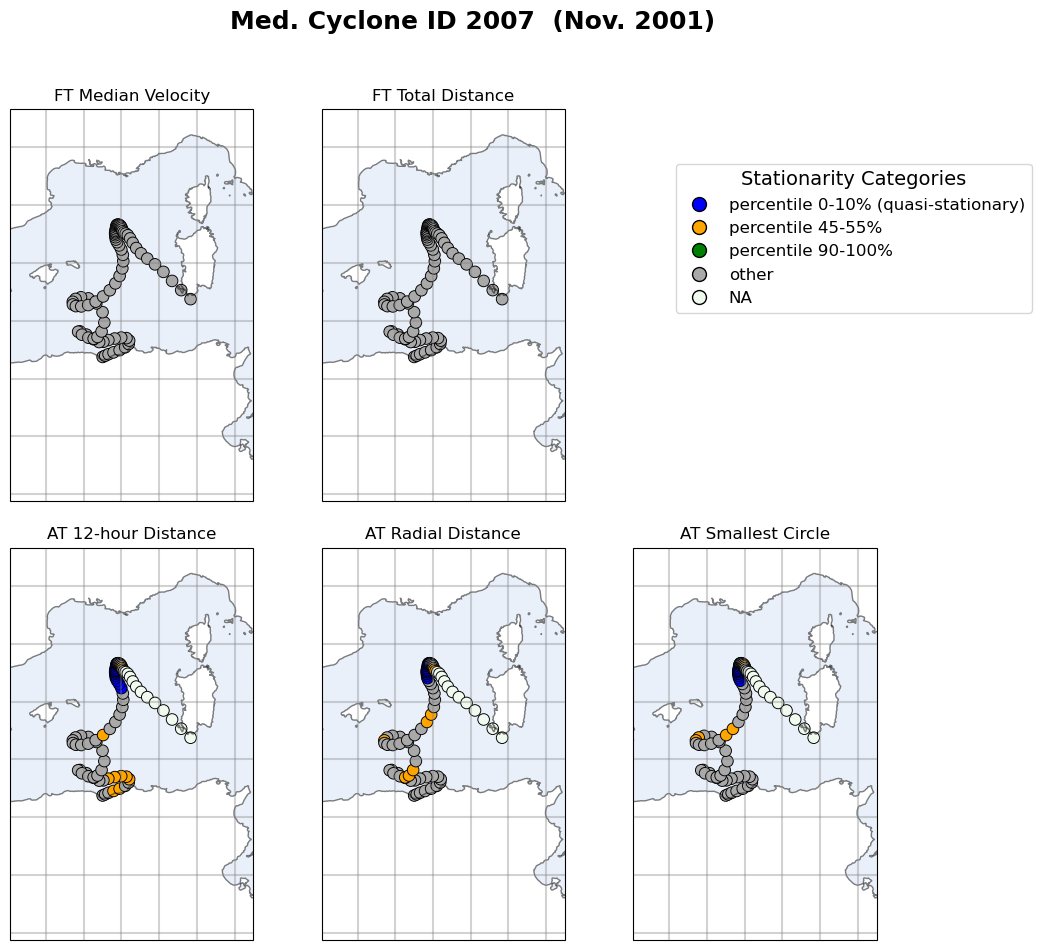

In [92]:
ID = 409

# Initialize plot with 5 subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 9), subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()  # Flatten the 2D array of axes for easy iteration

df_i = df_QS[df_QS.id == ID]
timestamp = pd.to_datetime(df_i.iloc[:, 3:6])  # Get full time array of cyclone

# Prepare categories for plotting
cats = [df_i.filter(like='_c').iloc[:,0].values, df_i.filter(like='_c').iloc[:,1].values, '',
        df_i.filter(like='_c').iloc[:,2].values, df_i.filter(like='_c').iloc[:,3].values, df_i.filter(like='_c').iloc[:,4].values]
labs =['FT Median Velocity','FT Total Distance','','AT 12-hour Distance','AT Radial Distance','AT Smallest Circle']


# Define a color mapping based on your specifications
color_mapping = {
    0: 'darkgray',  # Color for value 0
    1: 'blue',    # Color for value 1
    2: 'orange',   # Color for value 2
    3: 'green',  # Color for value 3
    np.nan: 'None'  # Color for NaN values
}

# Loop through each cyclone ID and create a subplot
for idx in range(6):
    if idx == 2:
        axs[idx].set_frame_on(False)
        pass
    else:
        # Add map extent, coastlines, gridlines, and aspect ratio
        # axs[idx].set_extent([min(df_i.lon)-2.5, max(df_i.lon)+2.5, min(df_i.lat)-5, max(df_i.lat)+3], crs=ccrs.PlateCarree()) # id 631
        # axs[idx].set_extent([min(df_i.lon)-2.5, max(df_i.lon)+2.5, min(df_i.lat)-2.2, max(df_i.lat)+2], crs=ccrs.PlateCarree()) # id 2753
        axs[idx].set_extent([min(df_i.lon)-2.5, max(df_i.lon)+2.5, min(df_i.lat)-5, max(df_i.lat)+4], crs=ccrs.PlateCarree()) # id 73
        axs[idx].coastlines(alpha=.5)
        axs[idx].add_feature(cfeature.OCEAN, alpha=.2)
        axs[idx].gridlines(alpha=.35, linewidth=1.5, color='gray')
        axs[idx].set_aspect(1.15)
        
        # Map the categories to colors
        colors = [color_mapping.get(value, '#f1faee') for value in cats[idx]]

        # Scatter plot
        sns.scatterplot(data=df_i, x='lon', y='lat', ax=axs[idx], c=colors, s=70, marker='o', edgecolor='k', alpha=1);

        # Set title for each subplot
        axs[idx].set_title(f'{labs[idx]}')

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markeredgecolor='k', markersize=10, label='percentile 0-10% (quasi-stationary)'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markeredgecolor='k', markersize=10, label='percentile 45-55%'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markeredgecolor='k', markersize=10, label='percentile 90-100%'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='darkgray', markeredgecolor='k', markersize=10, label='other'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#f1faee', markeredgecolor='k', markersize=10, label='NA')]

plt.legend(handles=handles, title='Stationarity Categories', bbox_to_anchor=(0.14, 2), loc='upper left', title_fontsize=14, fontsize=12)
        
plt.suptitle(f'Med. Cyclone ID {ID}  ({timestamp.mean().strftime("%b. %Y")})', fontweight='bold', size=18, x=.42, y=1.05)
plt.subplots_adjust(wspace=2)
plt.tight_layout()
plt.show()

fig.savefig(fig_dir+f'Med. Cyclone ID {ID}.jpg', dpi=500, bbox_inches='tight')

# Track Density Plots (df_crossers)

## General Distribution

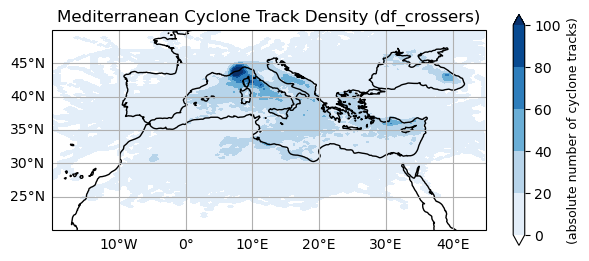

In [93]:
# Axes for binning
points_per_deg = 2
lon_bins = np.linspace(-20, 45, 65*points_per_deg+1)
lat_bins = np.linspace(20, 50, 70*points_per_deg+1)
bin_area = (lon_bins[1]-lon_bins[0])*(lat_bins[1]-lat_bins[0])
lon_bin_cents = (lon_bins[1::]+lon_bins[:-1:])/2
lat_bin_cents = (lat_bins[1::]+lat_bins[:-1:])/2

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-20, 45, 20, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)

# Computing 3D histogram
hist_datad = np.histogramdd((df_crossers.lon,df_crossers.lat,df_crossers.id), bins=[lon_bins,lat_bins,np.unique(df_crossers.id)])
# Eliminating duplicated storms and summing over different storms!!!
hist_data = np.transpose(np.sum((hist_datad[0]!=0),axis=2))
# Normalize by area and by total nr of storms in df_crossers 3190
#hist_data = hist_data/3190*100*points_per_deg
#hist_data[hist_data==0]=np.NaN

#Definitions
# Fixed colorbar range (0 to 100) and 6 bins
fixed_vmin = 0
fixed_vmax = 100
norm = mcolors.Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
# Define fixed contour levels (6 bins from 0 to 100)
contour_levels = np.linspace(fixed_vmin, fixed_vmax, 6)  # 6 bins
# Create the colormap (first white, then the rest of the blues)
cmap = mcolors.ListedColormap(['white'] + [plt.cm.Blues(i) for i in range(1, plt.cm.Blues.N)])

# Plotting the contour plot
h2 = ax.contourf(
    lon_bin_cents, lat_bin_cents, hist_data, contour_levels,
    norm=norm, cmap=cmap, extend='both', transform=ccrs.PlateCarree(), zorder=0
)

# Add colorbar with 10 bins and fixed range
cbar = fig.colorbar(h2, ax=ax, ticks=contour_levels)
cbar.set_label('(absolute number of cyclone tracks)', fontsize=9)

ax.set_title('Mediterranean Cyclone Track Density (df_crossers)', fontsize=12)
g1 = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
g1.top_labels = False
g1.right_labels = False
fig.set_size_inches(7,3)
fig.savefig(fig_dir+'track_density_dfcrossers.png', dpi=500)

## Full-track Stationarity (FT)

### Median Velocity

#### Fast

In [94]:
tracks_fast
len(tracks_fast)

10657

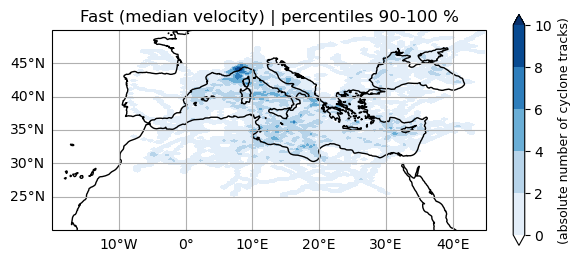

In [95]:
# Axes for binning
points_per_deg = 2
lon_bins = np.linspace(-20, 45, 65*points_per_deg+1)
lat_bins = np.linspace(20, 50, 70*points_per_deg+1)
bin_area = (lon_bins[1]-lon_bins[0])*(lat_bins[1]-lat_bins[0])
lon_bin_cents = (lon_bins[1::]+lon_bins[:-1:])/2
lat_bin_cents = (lat_bins[1::]+lat_bins[:-1:])/2

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-20, 45, 20, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)

# Computing 3D histogram
hist_datad = np.histogramdd((tracks_fast.lon,tracks_fast.lat,tracks_fast.id), bins=[lon_bins,lat_bins,np.unique(tracks_fast.id)])
# Eliminating duplicated storms and summing over different storms!!!
hist_data = np.transpose(np.sum((hist_datad[0]!=0),axis=2))
# Normalize by area and by total nr of storms in df_tracks (3190)
#hist_data = hist_data/3190*100*points_per_deg
#hist_data[hist_data==0]=np.NaN

# Fixed colorbar range (0 to 10) and 6 bins
fixed_vmin = 0
fixed_vmax = 10
norm = mcolors.Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
# Define fixed contour levels (6 bins from 0 to 10)
contour_levels = np.linspace(fixed_vmin, fixed_vmax, 6)  # 6 bins
# Create the colormap (first white, then the rest of the blues)
cmap = mcolors.ListedColormap(['white'] + [plt.cm.Blues(i) for i in range(1, plt.cm.Blues.N)])

# Plotting the contour plot
h2 = ax.contourf(
    lon_bin_cents, lat_bin_cents, hist_data, contour_levels,
    norm=norm, cmap=cmap, extend='both', transform=ccrs.PlateCarree(), zorder=0)

# Add colorbar with 10 bins and fixed range
cbar = fig.colorbar(h2, ax=ax, ticks=contour_levels)
cbar.set_label('(absolute number of cyclone tracks)', fontsize=9)

ax.set_title('Fast (median velocity) | percentiles 90-100 %', fontsize=12)
g1 = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
g1.top_labels = False
g1.right_labels = False
fig.set_size_inches(7,3)
fig.savefig(fig_dir+'track_density_fast.png', dpi=500)

#### Middle

In [96]:
tracks_middle

id     lon     lat  year  month  day  time      hPa  medi_track
1371      22   0.320  39.350  1979      2   28    22  1008.85        True
1372      22   0.965  39.236  1979      2   28    23  1008.24        True
1373      22   1.409  38.987  1979      3    1     0  1007.58        True
1374      22   1.732  38.750  1979      3    1     1  1006.74        True
1375      22   2.020  38.607  1979      3    1     2  1005.70        True
...      ...     ...     ...   ...    ...  ...   ...      ...         ...
165760  2360  20.416  35.441  2005      4   17     4   997.62        True
165761  2360  20.572  35.850  2005      4   17     5   998.17        True
165762  2360  20.702  36.262  2005      4   17     6   998.26        True
165763  2360  20.822  36.660  2005      4   17     7   998.69        True
165764  2360  20.940  37.050  2005      4   17     8   999.19        True

[8775 rows x 9 columns]

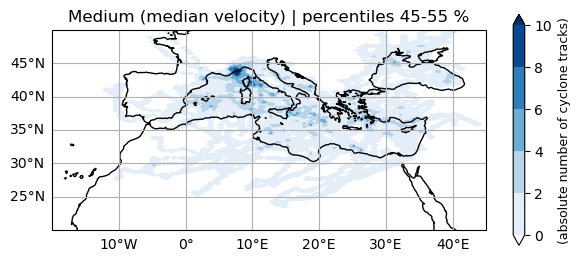

In [97]:
# Axes for binning
points_per_deg = 2
lon_bins = np.linspace(-20, 45, 65*points_per_deg+1)
lat_bins = np.linspace(20, 50, 70*points_per_deg+1)
bin_area = (lon_bins[1]-lon_bins[0])*(lat_bins[1]-lat_bins[0])
lon_bin_cents = (lon_bins[1::]+lon_bins[:-1:])/2
lat_bin_cents = (lat_bins[1::]+lat_bins[:-1:])/2

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-20, 45, 20, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)

# Computing 3D histogram
hist_datad = np.histogramdd((tracks_middle.lon,tracks_middle.lat,tracks_middle.id), bins=[lon_bins,lat_bins,np.unique(tracks_middle.id)])
# Eliminating duplicated storms and summing over different storms!!!
hist_data = np.transpose(np.sum((hist_datad[0]!=0),axis=2))
# Normalize by area and by total nr of storms in df_tracks (3190)
#hist_data = hist_data/3190*100*points_per_deg
#hist_data[hist_data==0]=np.NaN

## DEFINITIONS
# Fixed colorbar range (0 to 10) and 6 bins
fixed_vmin = 0
fixed_vmax = 10
norm = mcolors.Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
# Define fixed contour levels (6 bins from 0 to 10)
contour_levels = np.linspace(fixed_vmin, fixed_vmax, 6)  # 6 bins
# Create the colormap (first white, then the rest of the blues)
cmap = mcolors.ListedColormap(['white'] + [plt.cm.Blues(i) for i in range(1, plt.cm.Blues.N)])

# Plotting the contour plot
h2 = ax.contourf(
    lon_bin_cents, lat_bin_cents, hist_data, contour_levels,
    norm=norm, cmap=cmap, extend='both', transform=ccrs.PlateCarree(), zorder=0)

# Add colorbar with 10 bins and fixed range
cbar = fig.colorbar(h2, ax=ax, ticks=contour_levels)
cbar.set_label('(absolute number of cyclone tracks)', fontsize=9)

ax.set_title('Medium (median velocity) | percentiles 45-55 %', fontsize=12)
g1 = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
g1.top_labels = False
g1.right_labels = False
fig.set_size_inches(7,3)
fig.savefig(fig_dir+'track_density_middle.png', dpi=500)

#### Slow

In [98]:
tracks_slow

id     lon     lat  year  month  day  time      hPa  medi_track
537        9   1.500  43.000  1979      2    2    13   999.91        True
538        9   1.850  42.805  1979      2    2    14  1000.11        True
539        9   2.190  42.606  1979      2    2    15  1000.94        True
540        9   2.514  42.439  1979      2    2    16  1001.03        True
541        9   2.878  42.331  1979      2    2    17  1000.72        True
...      ...     ...     ...   ...    ...  ...   ...      ...         ...
166773  2377  24.529  26.431  2005      7   27     6  1007.36        True
166774  2377  24.613  26.307  2005      7   27     7  1007.55        True
166775  2377  24.704  26.195  2005      7   27     8  1007.57        True
166776  2377  24.825  26.083  2005      7   27     9  1007.47        True
166777  2377  24.960  25.970  2005      7   27    10  1007.24        True

[10610 rows x 9 columns]

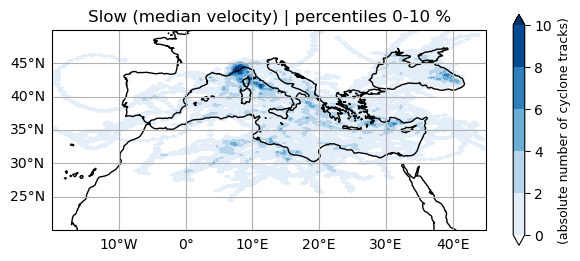

In [99]:
# Axes for binning
points_per_deg = 2
lon_bins = np.linspace(-20, 45, 65*points_per_deg+1)
lat_bins = np.linspace(20, 50, 70*points_per_deg+1)
bin_area = (lon_bins[1]-lon_bins[0])*(lat_bins[1]-lat_bins[0])
lon_bin_cents = (lon_bins[1::]+lon_bins[:-1:])/2
lat_bin_cents = (lat_bins[1::]+lat_bins[:-1:])/2

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-20, 45, 20, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)

# Computing 3D histogram
hist_datad = np.histogramdd((tracks_slow.lon,tracks_slow.lat,tracks_slow.id), bins=[lon_bins,lat_bins,np.unique(tracks_slow.id)])
# Eliminating duplicated storms and summing over different storms!!!
hist_data = np.transpose(np.sum((hist_datad[0]!=0),axis=2))
# Normalize by area and by total nr of storms in df_tracks (3190)
#hist_data = hist_data/3190*100*points_per_deg
#hist_data[hist_data==0]=np.NaN

## DEFINITIONS
# Fixed colorbar range (0 to 10) and 6 bins
fixed_vmin = 0
fixed_vmax = 10
norm = mcolors.Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
# Define fixed contour levels (6 bins from 0 to 10)
contour_levels = np.linspace(fixed_vmin, fixed_vmax, 6)  # 6 bins
# Create the colormap (first white, then the rest of the blues)
cmap = mcolors.ListedColormap(['white'] + [plt.cm.Blues(i) for i in range(1, plt.cm.Blues.N)])

# Plotting the contour plot
h2 = ax.contourf(
    lon_bin_cents, lat_bin_cents, hist_data, contour_levels,
    norm=norm, cmap=cmap, extend='both', transform=ccrs.PlateCarree(), zorder=0)

# Add colorbar with 10 bins and fixed range
cbar = fig.colorbar(h2, ax=ax, ticks=contour_levels)
cbar.set_label('(absolute number of cyclone tracks)', fontsize=9)

ax.set_title('Slow (median velocity) | percentiles 0-10 %', fontsize=12)
g1 = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
g1.top_labels = False
g1.right_labels = False
fig.set_size_inches(7,3)
fig.savefig(fig_dir+'track_density_slow.png', dpi=500)

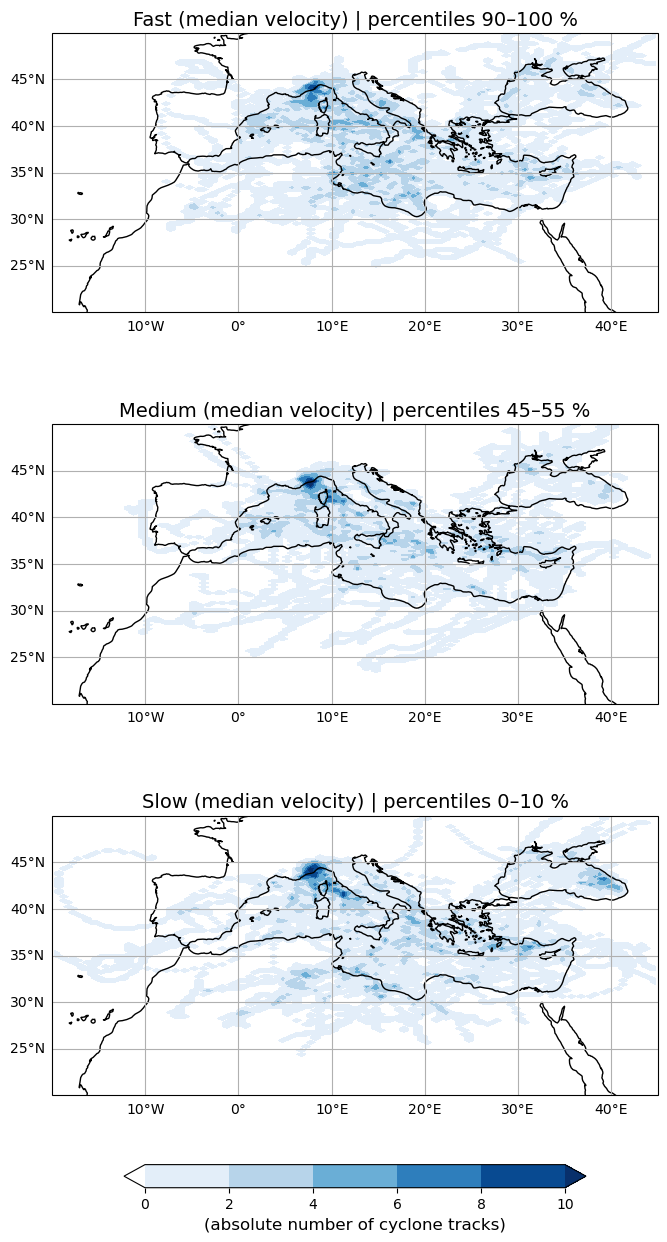

In [100]:
# Axes for binning
points_per_deg = 2
lon_bins = np.linspace(-20, 45, 65*points_per_deg+1)
lat_bins = np.linspace(20, 50, 70*points_per_deg+1)
bin_area = (lon_bins[1]-lon_bins[0])*(lat_bins[1]-lat_bins[0])
lon_bin_cents = (lon_bins[1::]+lon_bins[:-1:])/2
lat_bin_cents = (lat_bins[1::]+lat_bins[:-1:])/2

# Create a figure with 3 subplots arranged vertically
fig, axes = plt.subplots(3, 1, figsize=(8, 12), subplot_kw={'projection': ccrs.PlateCarree()})
fig.subplots_adjust(hspace=0.4)  # Adjust space between subplots

# Define colorbar parameters
fixed_vmin = 0
fixed_vmax = 10
norm = mcolors.Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
contour_levels = np.linspace(fixed_vmin, fixed_vmax, 6)  # 6 bins
cmap = mcolors.ListedColormap(['white'] + [plt.cm.Blues(i) for i in range(1, plt.cm.Blues.N)])

# Define the datasets and corresponding titles
datasets = [tracks_fast, tracks_middle, tracks_slow]
titles = ['Fast (median velocity) | percentiles 90–100 %', 
          'Medium (median velocity) | percentiles 45–55 %', 
          'Slow (median velocity) | percentiles 0–10 %']

# Loop through each subplot, plot the histogram data, and add the colorbar
for i, (ax, dataset) in enumerate(zip(axes, datasets)):
    # Computing 3D histogram for the dataset
    hist_datad = np.histogramdd((dataset.lon, dataset.lat, dataset.id), bins=[lon_bins, lat_bins, np.unique(dataset.id)])
    hist_data = np.transpose(np.sum((hist_datad[0] != 0), axis=2))

    # Plotting the contour plot for each subplot
    h2 = ax.contourf(
        lon_bin_cents, lat_bin_cents, hist_data, contour_levels,
        norm=norm, cmap=cmap, extend='both', transform=ccrs.PlateCarree(), zorder=0
    )

    ax.set_extent([-20, 45, 20, 50], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.set_title(titles[i], fontsize=14)
    g1 = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    g1.top_labels = False
    g1.right_labels = False

# Add colorbar for the contour levels at the bottom
cbar = fig.colorbar(h2, ax=axes, orientation='horizontal', fraction=0.02, pad=0.06, ticks=contour_levels)
cbar.set_label('(absolute number of cyclone tracks)', fontsize=12)

# Set figure size and save
fig.set_size_inches(8, 15)
fig.savefig(fig_dir+'track_density_medvel.png', dpi=500)

### Total Distance (Path Stationarity)

#### Long

In [101]:
# Overview data
tracks_long    #pd.read_csv('/scratch2/mganci/for_marina/tracks_long_Aregger-path.txt', delimiter = '\t')


id     lon     lat  year  month  day  time      hPa  medi_track
320        6  16.730  33.810  1979      1   16     5  1013.68        True
321        6  17.143  34.028  1979      1   16     6  1013.81        True
322        6  17.403  34.128  1979      1   16     7  1014.12        True
323        6  17.582  34.101  1979      1   16     8  1014.34        True
324        6  17.742  33.953  1979      1   16     9  1014.47        True
...      ...     ...     ...   ...    ...  ...   ...      ...         ...
166089  2366   7.031  43.565  2005      5    9    19  1007.93        True
166090  2366   7.030  43.473  2005      5    9    20  1008.95        True
166091  2366   7.087  43.429  2005      5    9    21  1009.89        True
166092  2366   7.263  43.450  2005      5    9    22  1010.22        True
166093  2366   7.500  43.500  2005      5    9    23  1010.64        True

[11109 rows x 9 columns]

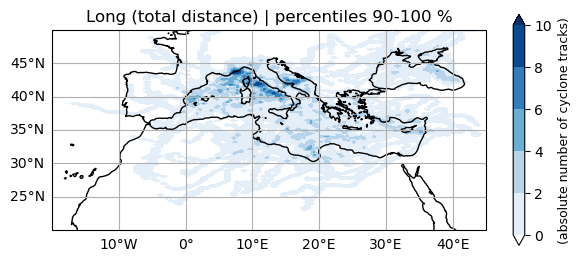

In [102]:
# Axes for binning
points_per_deg = 2
lon_bins = np.linspace(-20, 45, 65*points_per_deg+1)
lat_bins = np.linspace(20, 50, 70*points_per_deg+1)
bin_area = (lon_bins[1]-lon_bins[0])*(lat_bins[1]-lat_bins[0])
lon_bin_cents = (lon_bins[1::]+lon_bins[:-1:])/2
lat_bin_cents = (lat_bins[1::]+lat_bins[:-1:])/2

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-20, 45, 20, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)

# Computing 3D histogram
hist_datad = np.histogramdd((tracks_long.lon,tracks_long.lat,tracks_long.id), bins=[lon_bins,lat_bins,np.unique(tracks_long.id)])
# Eliminating duplicated storms and summing over different storms!!!
hist_data = np.transpose(np.sum((hist_datad[0]!=0),axis=2))
# Normalize by area and by total nr of storms in df_tracks (3190)
#hist_data = hist_data/3190*100*points_per_deg
#hist_data[hist_data==0]=np.NaN

#Definitions
# Fixed colorbar range (0 to 10) and 6 bins
fixed_vmin = 0
fixed_vmax = 10
norm = mcolors.Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
# Define fixed contour levels (6 bins from 0 to 10)
contour_levels = np.linspace(fixed_vmin, fixed_vmax, 6)  # 6 bins
# Create the colormap (first white, then the rest of the blues)
cmap = mcolors.ListedColormap(['white'] + [plt.cm.Blues(i) for i in range(1, plt.cm.Blues.N)])

# Plotting the contour plot
h2 = ax.contourf(
    lon_bin_cents, lat_bin_cents, hist_data, contour_levels,
    norm=norm, cmap=cmap, extend='both', transform=ccrs.PlateCarree(), zorder=0
)

# Add colorbar with 10 bins and fixed range
cbar = fig.colorbar(h2, ax=ax, ticks=contour_levels)
cbar.set_label('(absolute number of cyclone tracks)', fontsize=9)

ax.set_title('Long (total distance) | percentiles 90-100 %', fontsize=12)
g1 = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
g1.top_labels = False
g1.right_labels = False
fig.set_size_inches(7,3)
fig.savefig(fig_dir+'track_density_long.png', dpi=500)

#### Midi

In [103]:
# Overview data
tracks_midi    #pd.read_csv('/scratch2/mganci/for_marina/tracks_long_Aregger-path.txt', delimiter = '\t')


id    lon     lat  year  month  day  time      hPa  medi_track
1796      27  6.550  30.770  1979      3   27    21  1004.95        True
1797      27  7.005  30.724  1979      3   27    22  1005.16        True
1798      27  7.430  30.676  1979      3   27    23  1004.15        True
1799      27  7.850  30.621  1979      3   28     0  1003.94        True
1800      27  8.290  30.550  1979      3   28     1  1003.60        True
...      ...    ...     ...   ...    ...  ...   ...      ...         ...
165684  2359  7.250  40.739  2005      4   10     9  1006.04        True
165685  2359  7.402  40.498  2005      4   10    10  1005.62        True
165686  2359  7.558  40.264  2005      4   10    11  1004.75        True
165687  2359  7.656  40.052  2005      4   10    12  1003.39        True
165688  2359  7.720  39.850  2005      4   10    13  1001.50        True

[9650 rows x 9 columns]

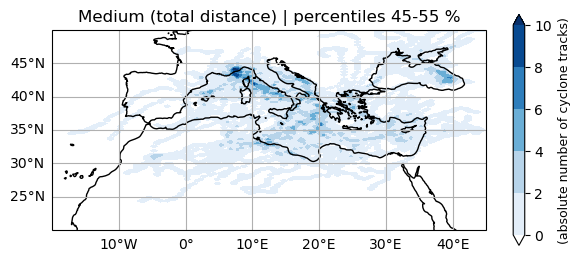

In [104]:
# Axes for binning
points_per_deg = 2
lon_bins = np.linspace(-20, 45, 65*points_per_deg+1)
lat_bins = np.linspace(20, 50, 70*points_per_deg+1)
bin_area = (lon_bins[1]-lon_bins[0])*(lat_bins[1]-lat_bins[0])
lon_bin_cents = (lon_bins[1::]+lon_bins[:-1:])/2
lat_bin_cents = (lat_bins[1::]+lat_bins[:-1:])/2

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-20, 45, 20, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)

# Computing 3D histogram
hist_datad = np.histogramdd((tracks_midi.lon,tracks_midi.lat,tracks_midi.id), bins=[lon_bins,lat_bins,np.unique(tracks_midi.id)])
# Eliminating duplicated storms and summing over different storms!!!
hist_data = np.transpose(np.sum((hist_datad[0]!=0),axis=2))
# Normalize by area and by total nr of storms in df_tracks (3190)
#hist_data = hist_data/3190*100*points_per_deg
#hist_data[hist_data==0]=np.NaN

#Definitions
# Fixed colorbar range (0 to 10) and 6 bins
fixed_vmin = 0
fixed_vmax = 10
norm = mcolors.Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
# Define fixed contour levels (6 bins from 0 to 10)
contour_levels = np.linspace(fixed_vmin, fixed_vmax, 6)  # 6 bins
# Create the colormap (first white, then the rest of the blues)
cmap = mcolors.ListedColormap(['white'] + [plt.cm.Blues(i) for i in range(1, plt.cm.Blues.N)])

# Plotting the contour plot
h2 = ax.contourf(
    lon_bin_cents, lat_bin_cents, hist_data, contour_levels,
    norm=norm, cmap=cmap, extend='both', transform=ccrs.PlateCarree(), zorder=0
)

# Add colorbar with 10 bins and fixed range
cbar = fig.colorbar(h2, ax=ax, ticks=contour_levels)
cbar.set_label('(absolute number of cyclone tracks)', fontsize=9)

ax.set_title('Medium (total distance) | percentiles 45-55 %', fontsize=12)
g1 = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
g1.top_labels = False
g1.right_labels = False
fig.set_size_inches(7,3)
fig.savefig(fig_dir+'track_density_midi.png', dpi=500)

#### Short

In [105]:
# Overview data
tracks_short    #pd.read_csv('/scratch2/mganci/for_marina/tracks_long_Aregger-path.txt', delimiter = '\t')

id     lon     lat  year  month  day  time      hPa  medi_track
537        9   1.500  43.000  1979      2    2    13   999.91        True
538        9   1.850  42.805  1979      2    2    14  1000.11        True
539        9   2.190  42.606  1979      2    2    15  1000.94        True
540        9   2.514  42.439  1979      2    2    16  1001.03        True
541        9   2.878  42.331  1979      2    2    17  1000.72        True
...      ...     ...     ...   ...    ...  ...   ...      ...         ...
165941  2364  22.324  40.263  2005      5    7     5   995.23        True
165942  2364  22.329  40.332  2005      5    7     6   995.33        True
165943  2364  22.497  40.356  2005      5    7     7   994.62        True
165944  2364  22.771  40.343  2005      5    7     8   994.51        True
165945  2364  23.070  40.320  2005      5    7     9   994.60        True

[10569 rows x 9 columns]

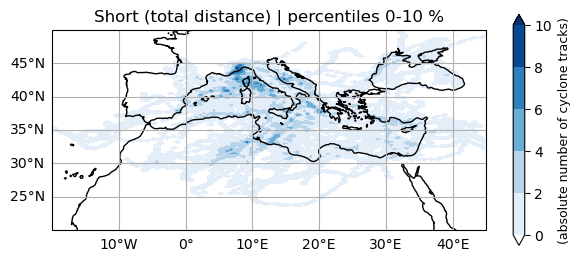

In [106]:
# Axes for binning
points_per_deg = 2
lon_bins = np.linspace(-20, 45, 65*points_per_deg+1)
lat_bins = np.linspace(20, 50, 70*points_per_deg+1)
bin_area = (lon_bins[1]-lon_bins[0])*(lat_bins[1]-lat_bins[0])
lon_bin_cents = (lon_bins[1::]+lon_bins[:-1:])/2
lat_bin_cents = (lat_bins[1::]+lat_bins[:-1:])/2

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-20, 45, 20, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)

# Computing 3D histogram
hist_datad = np.histogramdd((tracks_short.lon,tracks_short.lat,tracks_short.id), bins=[lon_bins,lat_bins,np.unique(tracks_short.id)])
# Eliminating duplicated storms and summing over different storms!!!
hist_data = np.transpose(np.sum((hist_datad[0]!=0),axis=2))
# Normalize by area and by total nr of storms in df_tracks (3190)
#hist_data = hist_data/3190*100*points_per_deg
#hist_data[hist_data==0]=np.NaN

#Definitions
# Fixed colorbar range (0 to 10) and 6 bins
fixed_vmin = 0
fixed_vmax = 10
norm = mcolors.Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
# Define fixed contour levels (6 bins from 0 to 10)
contour_levels = np.linspace(fixed_vmin, fixed_vmax, 6)  # 6 bins
# Create the colormap (first white, then the rest of the blues)
cmap = mcolors.ListedColormap(['white'] + [plt.cm.Blues(i) for i in range(1, plt.cm.Blues.N)])

# Plotting the contour plot
h2 = ax.contourf(
    lon_bin_cents, lat_bin_cents, hist_data, contour_levels,
    norm=norm, cmap=cmap, extend='both', transform=ccrs.PlateCarree(), zorder=0
)

# Add colorbar with 10 bins and fixed range
cbar = fig.colorbar(h2, ax=ax, ticks=contour_levels)
cbar.set_label('(absolute number of cyclone tracks)', fontsize=9)

ax.set_title('Short (total distance) | percentiles 0-10 %', fontsize=12)
g1 = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
g1.top_labels = False
g1.right_labels = False
fig.set_size_inches(7,3)
fig.savefig(fig_dir+'track_density_short.png', dpi=500)

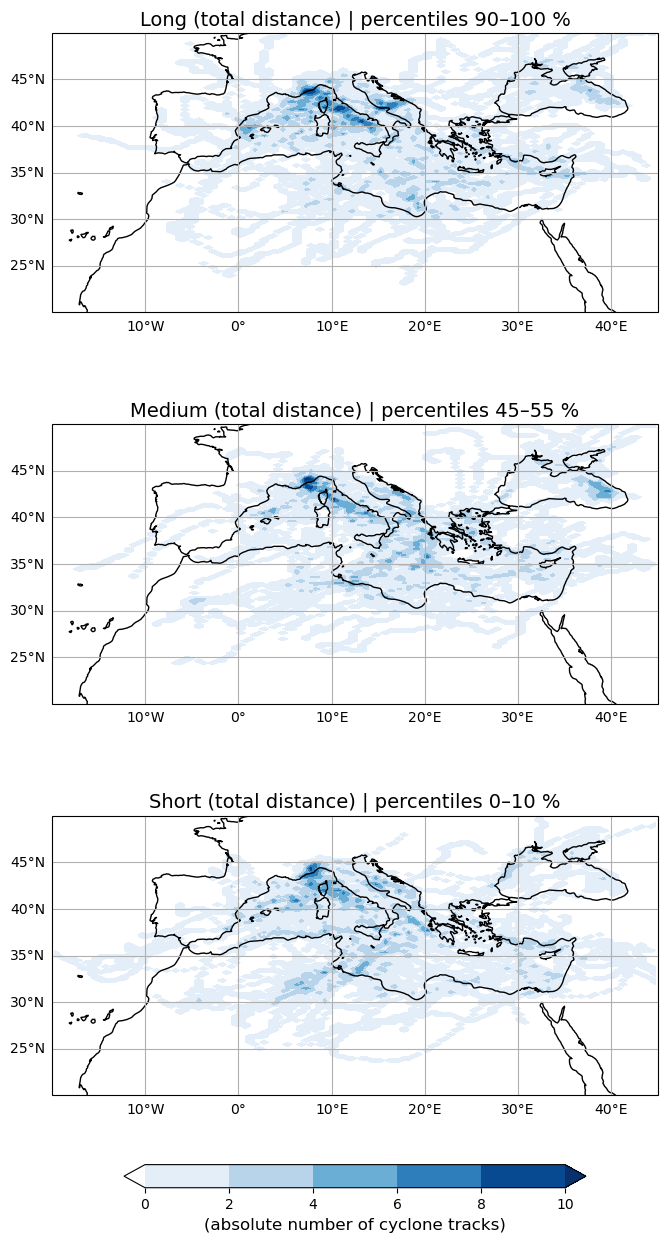

In [107]:
# ALL THREE
# Axes for binning
points_per_deg = 2
lon_bins = np.linspace(-20, 45, 65*points_per_deg+1)
lat_bins = np.linspace(20, 50, 70*points_per_deg+1)
bin_area = (lon_bins[1]-lon_bins[0])*(lat_bins[1]-lat_bins[0])
lon_bin_cents = (lon_bins[1::]+lon_bins[:-1:])/2
lat_bin_cents = (lat_bins[1::]+lat_bins[:-1:])/2

# Create a figure with 3 subplots arranged vertically
fig, axes = plt.subplots(3, 1, figsize=(8, 15), subplot_kw={'projection': ccrs.PlateCarree()})
fig.subplots_adjust(hspace=0.4)  # Adjust space between subplots

# Define colorbar parameters
fixed_vmin = 0
fixed_vmax = 10
norm = mcolors.Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
contour_levels = np.linspace(fixed_vmin, fixed_vmax, 6)  # 6 bins
cmap = mcolors.ListedColormap(['white'] + [plt.cm.Blues(i) for i in range(1, plt.cm.Blues.N)])

# Define the datasets and corresponding titles
datasets = [tracks_long, tracks_midi, tracks_short]
titles = ['Long (total distance) | percentiles 90–100 %', 
          'Medium (total distance) | percentiles 45–55 %', 
          'Short (total distance) | percentiles 0–10 %']

# Loop through each subplot, plot the histogram data, and add the colorbar
for i, (ax, dataset) in enumerate(zip(axes, datasets)):
    # Computing 3D histogram for the dataset
    hist_datad = np.histogramdd((dataset.lon, dataset.lat, dataset.id), bins=[lon_bins, lat_bins, np.unique(dataset.id)])
    hist_data = np.transpose(np.sum((hist_datad[0] != 0), axis=2))

    # Plotting the contour plot for each subplot
    h2 = ax.contourf(
        lon_bin_cents, lat_bin_cents, hist_data, contour_levels,
        norm=norm, cmap=cmap, extend='both', transform=ccrs.PlateCarree(), zorder=0
    )

    ax.set_extent([-20, 45, 20, 50], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.set_title(titles[i], fontsize=14)
    g1 = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    g1.top_labels = False
    g1.right_labels = False

# Add colorbar for the contour levels at the bottom
cbar = fig.colorbar(h2, ax=axes, orientation='horizontal', fraction=0.02, pad=0.06, ticks=contour_levels)
cbar.set_label('(absolute number of cyclone tracks)', fontsize=12)

# Set figure size and save
fig.set_size_inches(8, 15)
fig.savefig(fig_dir+'track_density_totdist.png', dpi=500)

### Total Duration

#### Longest lasting 10%

In [108]:
tracks_longdur

id     lon     lat  year  month  day  time      hPa  medi_track
736       12  24.750  43.000  1979      2   14     4   995.92        True
737       12  25.005  43.060  1979      2   14     5   995.52        True
738       12  25.220  43.073  1979      2   14     6   995.30        True
739       12  25.382  43.052  1979      2   14     7   995.70        True
740       12  25.587  43.074  1979      2   14     8   995.53        True
...      ...     ...     ...   ...    ...  ...   ...      ...         ...
166288  2370  12.935  45.023  2005      5   18     8  1004.76        True
166289  2370  13.429  45.116  2005      5   18     9  1005.31        True
166290  2370  14.164  45.275  2005      5   18    10  1005.69        True
166291  2370  15.310  45.586  2005      5   18    11  1005.00        True
166292  2370  16.670  45.970  2005      5   18    12  1004.62        True

[10965 rows x 9 columns]

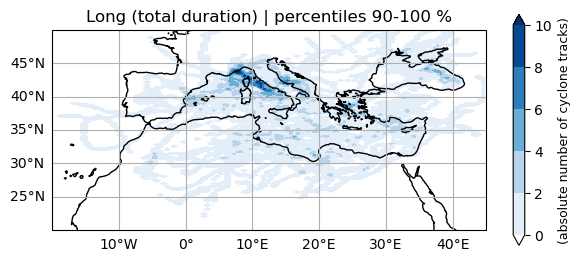

In [109]:
# Axes for binning
points_per_deg = 2
lon_bins = np.linspace(-20, 45, 65*points_per_deg+1)
lat_bins = np.linspace(20, 50, 70*points_per_deg+1)
bin_area = (lon_bins[1]-lon_bins[0])*(lat_bins[1]-lat_bins[0])
lon_bin_cents = (lon_bins[1::]+lon_bins[:-1:])/2
lat_bin_cents = (lat_bins[1::]+lat_bins[:-1:])/2

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-20, 45, 20, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)

# Computing 3D histogram
hist_datad = np.histogramdd((tracks_longdur.lon,tracks_longdur.lat,tracks_longdur.id), bins=[lon_bins,lat_bins,np.unique(tracks_longdur.id)])
# Eliminating duplicated storms and summing over different storms!!!
hist_data = np.transpose(np.sum((hist_datad[0]!=0),axis=2))
# Normalize by area and by total nr of storms in df_tracks (3190)
#hist_data = hist_data/3190*100*points_per_deg
#hist_data[hist_data==0]=np.NaN

#Definitions
# Fixed colorbar range (0 to 10) and 6 bins
fixed_vmin = 0
fixed_vmax = 10
norm = mcolors.Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
# Define fixed contour levels (6 bins from 0 to 10)
contour_levels = np.linspace(fixed_vmin, fixed_vmax, 6)  # 6 bins
# Create the colormap (first white, then the rest of the blues)
cmap = mcolors.ListedColormap(['white'] + [plt.cm.Blues(i) for i in range(1, plt.cm.Blues.N)])

# Plotting the contour plot
h2 = ax.contourf(
    lon_bin_cents, lat_bin_cents, hist_data, contour_levels,
    norm=norm, cmap=cmap, extend='both', transform=ccrs.PlateCarree(), zorder=0
)

# Add colorbar with 10 bins and fixed range
cbar = fig.colorbar(h2, ax=ax, ticks=contour_levels)
cbar.set_label('(absolute number of cyclone tracks)', fontsize=9)

ax.set_title('Long (total duration) | percentiles 90-100 %', fontsize=12)
g1 = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
g1.top_labels = False
g1.right_labels = False
fig.set_size_inches(7,3)
fig.savefig(fig_dir+'track_density_longdur.png', dpi=500)

#### Midur

In [110]:
tracks_midur

id    lon     lat  year  month  day  time      hPa  medi_track
2810      40  2.370  29.780  1979      6    5    11  1002.61        True
2811      40  3.005  29.505  1979      6    5    12  1002.09        True
2812      40  3.455  29.312  1979      6    5    13  1001.53        True
2813      40  3.762  29.201  1979      6    5    14  1000.86        True
2814      40  4.001  29.148  1979      6    5    15  1000.54        True
...      ...    ...     ...   ...    ...  ...   ...      ...         ...
165684  2359  7.250  40.739  2005      4   10     9  1006.04        True
165685  2359  7.402  40.498  2005      4   10    10  1005.62        True
165686  2359  7.558  40.264  2005      4   10    11  1004.75        True
165687  2359  7.656  40.052  2005      4   10    12  1003.39        True
165688  2359  7.720  39.850  2005      4   10    13  1001.50        True

[9179 rows x 9 columns]

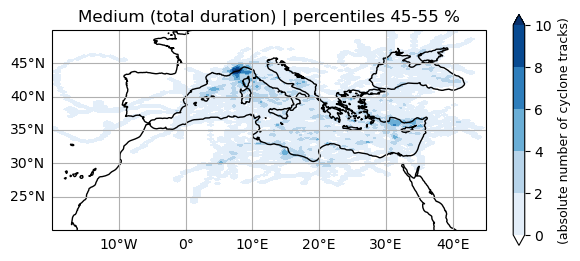

In [111]:
# Axes for binning
points_per_deg = 2
lon_bins = np.linspace(-20, 45, 65*points_per_deg+1)
lat_bins = np.linspace(20, 50, 70*points_per_deg+1)
bin_area = (lon_bins[1]-lon_bins[0])*(lat_bins[1]-lat_bins[0])
lon_bin_cents = (lon_bins[1::]+lon_bins[:-1:])/2
lat_bin_cents = (lat_bins[1::]+lat_bins[:-1:])/2

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-20, 45, 20, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)

# Computing 3D histogram
hist_datad = np.histogramdd((tracks_midur.lon,tracks_midur.lat,tracks_midur.id), bins=[lon_bins,lat_bins,np.unique(tracks_midur.id)])
# Eliminating duplicated storms and summing over different storms!!!
hist_data = np.transpose(np.sum((hist_datad[0]!=0),axis=2))
# Normalize by area and by total nr of storms in df_tracks (3190)
#hist_data = hist_data/3190*100*points_per_deg
#hist_data[hist_data==0]=np.NaN

#Definitions
# Fixed colorbar range (0 to 10) and 6 bins
fixed_vmin = 0
fixed_vmax = 10
norm = mcolors.Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
# Define fixed contour levels (6 bins from 0 to 10)
contour_levels = np.linspace(fixed_vmin, fixed_vmax, 6)  # 6 bins
# Create the colormap (first white, then the rest of the blues)
cmap = mcolors.ListedColormap(['white'] + [plt.cm.Blues(i) for i in range(1, plt.cm.Blues.N)])

# Plotting the contour plot
h2 = ax.contourf(
    lon_bin_cents, lat_bin_cents, hist_data, contour_levels,
    norm=norm, cmap=cmap, extend='both', transform=ccrs.PlateCarree(), zorder=0
)

# Add colorbar with 10 bins and fixed range
cbar = fig.colorbar(h2, ax=ax, ticks=contour_levels)
cbar.set_label('(absolute number of cyclone tracks)', fontsize=9)

ax.set_title('Medium (total duration) | percentiles 45-55 %', fontsize=12)
g1 = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
g1.top_labels = False
g1.right_labels = False
fig.set_size_inches(7,3)
fig.savefig(fig_dir+'track_density_midur.png', dpi=500)

#### Shortest lasting

In [112]:
tracks_shortdur

id     lon     lat  year  month  day  time      hPa  medi_track
537        9   1.500  43.000  1979      2    2    13   999.91        True
538        9   1.850  42.805  1979      2    2    14  1000.11        True
539        9   2.190  42.606  1979      2    2    15  1000.94        True
540        9   2.514  42.439  1979      2    2    16  1001.03        True
541        9   2.878  42.331  1979      2    2    17  1000.72        True
...      ...     ...     ...   ...    ...  ...   ...      ...         ...
165760  2360  20.416  35.441  2005      4   17     4   997.62        True
165761  2360  20.572  35.850  2005      4   17     5   998.17        True
165762  2360  20.702  36.262  2005      4   17     6   998.26        True
165763  2360  20.822  36.660  2005      4   17     7   998.69        True
165764  2360  20.940  37.050  2005      4   17     8   999.19        True

[11718 rows x 9 columns]

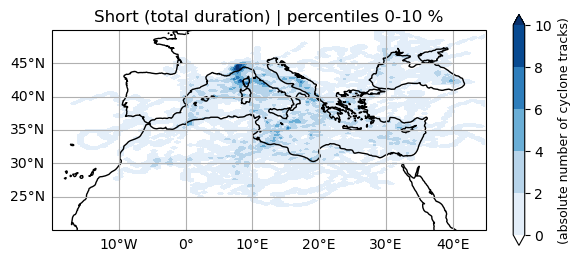

In [113]:
# Axes for binning
points_per_deg = 2
lon_bins = np.linspace(-20, 45, 65*points_per_deg+1)
lat_bins = np.linspace(20, 50, 70*points_per_deg+1)
bin_area = (lon_bins[1]-lon_bins[0])*(lat_bins[1]-lat_bins[0])
lon_bin_cents = (lon_bins[1::]+lon_bins[:-1:])/2
lat_bin_cents = (lat_bins[1::]+lat_bins[:-1:])/2

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-20, 45, 20, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)

# Computing 3D histogram
hist_datad = np.histogramdd((tracks_shortdur.lon,tracks_shortdur.lat,tracks_shortdur.id), bins=[lon_bins,lat_bins,np.unique(tracks_shortdur.id)])
# Eliminating duplicated storms and summing over different storms!!!
hist_data = np.transpose(np.sum((hist_datad[0]!=0),axis=2))
# Normalize by area and by total nr of storms in df_tracks (3190)
#hist_data = hist_data/3190*100*points_per_deg
#hist_data[hist_data==0]=np.NaN

#Definitions
# Fixed colorbar range (0 to 10) and 6 bins
fixed_vmin = 0
fixed_vmax = 10
norm = mcolors.Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
# Define fixed contour levels (6 bins from 0 to 10)
contour_levels = np.linspace(fixed_vmin, fixed_vmax, 6)  # 6 bins
# Create the colormap (first white, then the rest of the blues)
cmap = mcolors.ListedColormap(['white'] + [plt.cm.Blues(i) for i in range(1, plt.cm.Blues.N)])

# Plotting the contour plot
h2 = ax.contourf(
    lon_bin_cents, lat_bin_cents, hist_data, contour_levels,
    norm=norm, cmap=cmap, extend='both', transform=ccrs.PlateCarree(), zorder=0
)

# Add colorbar with 10 bins and fixed range
cbar = fig.colorbar(h2, ax=ax, ticks=contour_levels)
cbar.set_label('(absolute number of cyclone tracks)', fontsize=9)

ax.set_title('Short (total duration) | percentiles 0-10 %', fontsize=12)
g1 = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
g1.top_labels = False
g1.right_labels = False
fig.set_size_inches(7,3)
fig.savefig(fig_dir+'track_density_shortdur.png', dpi=500)

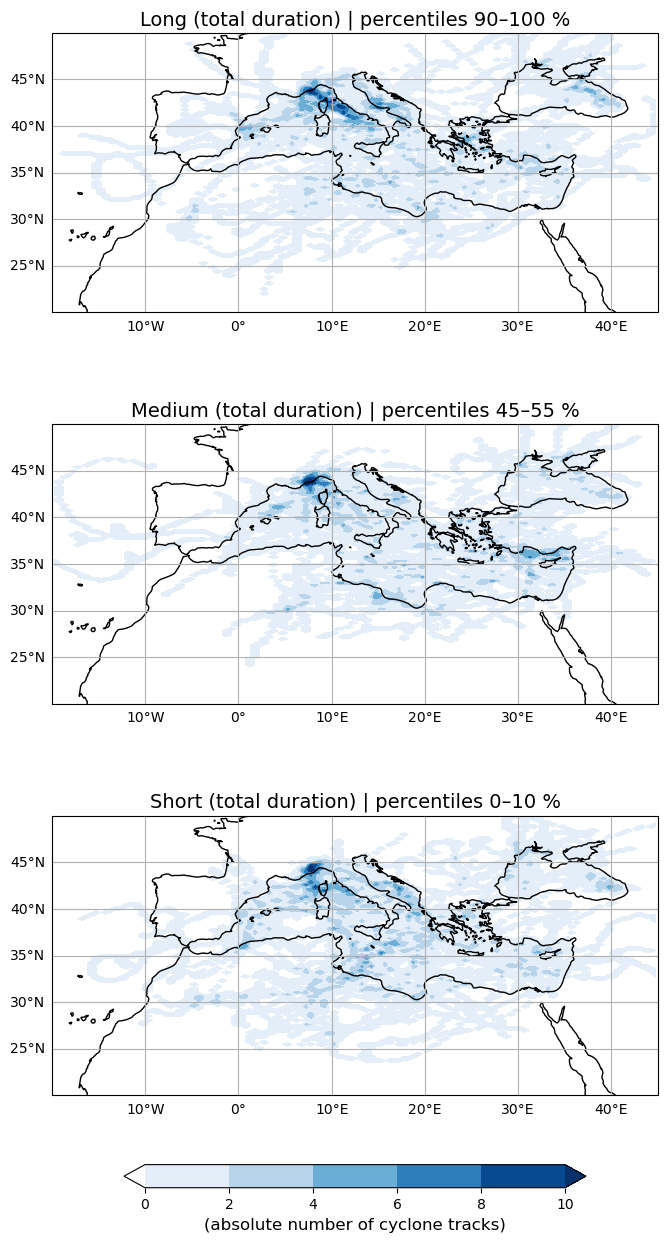

In [114]:
# ALL THREE
# Axes for binning
points_per_deg = 2
lon_bins = np.linspace(-20, 45, 65*points_per_deg+1)
lat_bins = np.linspace(20, 50, 70*points_per_deg+1)
bin_area = (lon_bins[1]-lon_bins[0])*(lat_bins[1]-lat_bins[0])
lon_bin_cents = (lon_bins[1::]+lon_bins[:-1:])/2
lat_bin_cents = (lat_bins[1::]+lat_bins[:-1:])/2

# Create a figure with 3 subplots arranged vertically
fig, axes = plt.subplots(3, 1, figsize=(8, 15), subplot_kw={'projection': ccrs.PlateCarree()})
fig.subplots_adjust(hspace=0.4)  # Adjust space between subplots

# Define colorbar parameters
fixed_vmin = 0
fixed_vmax = 10
norm = mcolors.Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
contour_levels = np.linspace(fixed_vmin, fixed_vmax, 6)  # 6 bins
cmap = mcolors.ListedColormap(['white'] + [plt.cm.Blues(i) for i in range(1, plt.cm.Blues.N)])

# Define the datasets and corresponding titles
datasets = [tracks_longdur, tracks_midur, tracks_shortdur]
titles = ['Long (total duration) | percentiles 90–100 %', 
          'Medium (total duration) | percentiles 45–55 %', 
          'Short (total duration) | percentiles 0–10 %']

# Loop through each subplot, plot the histogram data, and add the colorbar
for i, (ax, dataset) in enumerate(zip(axes, datasets)):
    # Computing 3D histogram for the dataset
    hist_datad = np.histogramdd((dataset.lon, dataset.lat, dataset.id), bins=[lon_bins, lat_bins, np.unique(dataset.id)])
    hist_data = np.transpose(np.sum((hist_datad[0] != 0), axis=2))

    # Plotting the contour plot for each subplot
    h2 = ax.contourf(
        lon_bin_cents, lat_bin_cents, hist_data, contour_levels,
        norm=norm, cmap=cmap, extend='both', transform=ccrs.PlateCarree(), zorder=0
    )

    ax.set_extent([-20, 45, 20, 50], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.set_title(titles[i], fontsize=14)
    g1 = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    g1.top_labels = False
    g1.right_labels = False

# Add colorbar for the contour levels at the bottom
cbar = fig.colorbar(h2, ax=axes, orientation='horizontal', fraction=0.02, pad=0.06, ticks=contour_levels)
cbar.set_label('(absolute number of cyclone tracks)', fontsize=12)

# Set figure size and save
fig.set_size_inches(8, 15)
fig.savefig(fig_dir+'track_density_dur.png', dpi=500)

### Mean Velocity

#### Fast

In [115]:
tracks_fast_m
len(tracks_fast_m)

11425

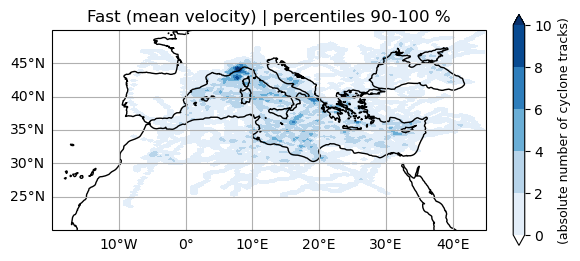

In [116]:
# Axes for binning
points_per_deg = 2
lon_bins = np.linspace(-20, 45, 65*points_per_deg+1)
lat_bins = np.linspace(20, 50, 70*points_per_deg+1)
bin_area = (lon_bins[1]-lon_bins[0])*(lat_bins[1]-lat_bins[0])
lon_bin_cents = (lon_bins[1::]+lon_bins[:-1:])/2
lat_bin_cents = (lat_bins[1::]+lat_bins[:-1:])/2

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-20, 45, 20, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)

# Computing 3D histogram
hist_datad = np.histogramdd((tracks_fast_m.lon,tracks_fast_m.lat,tracks_fast_m.id), bins=[lon_bins,lat_bins,np.unique(tracks_fast_m.id)])
# Eliminating duplicated storms and summing over different storms!!!
hist_data = np.transpose(np.sum((hist_datad[0]!=0),axis=2))
# Normalize by area and by total nr of storms in df_tracks (3190)
#hist_data = hist_data/3190*100*points_per_deg
#hist_data[hist_data==0]=np.NaN

# Fixed colorbar range (0 to 10) and 6 bins
fixed_vmin = 0
fixed_vmax = 10
norm = mcolors.Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
# Define fixed contour levels (6 bins from 0 to 10)
contour_levels = np.linspace(fixed_vmin, fixed_vmax, 6)  # 6 bins
# Create the colormap (first white, then the rest of the blues)
cmap = mcolors.ListedColormap(['white'] + [plt.cm.Blues(i) for i in range(1, plt.cm.Blues.N)])

# Plotting the contour plot
h2 = ax.contourf(
    lon_bin_cents, lat_bin_cents, hist_data, contour_levels,
    norm=norm, cmap=cmap, extend='both', transform=ccrs.PlateCarree(), zorder=0)

# Add colorbar with 10 bins and fixed range
cbar = fig.colorbar(h2, ax=ax, ticks=contour_levels)
cbar.set_label('(absolute number of cyclone tracks)', fontsize=9)

ax.set_title('Fast (mean velocity) | percentiles 90-100 %', fontsize=12)
g1 = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
g1.top_labels = False
g1.right_labels = False
fig.set_size_inches(7,3)
fig.savefig(fig_dir+'track_density_fast_m.png', dpi=500)

#### Middle

In [117]:
tracks_middle_m

id     lon     lat  year  month  day  time      hPa  medi_track
1371      22   0.320  39.350  1979      2   28    22  1008.85        True
1372      22   0.965  39.236  1979      2   28    23  1008.24        True
1373      22   1.409  38.987  1979      3    1     0  1007.58        True
1374      22   1.732  38.750  1979      3    1     1  1006.74        True
1375      22   2.020  38.607  1979      3    1     2  1005.70        True
...      ...     ...     ...   ...    ...  ...   ...      ...         ...
166134  2367  22.206  27.792  2005      5   11     4  1011.67        True
166135  2367  22.209  27.659  2005      5   11     5  1012.31        True
166136  2367  22.234  27.511  2005      5   11     6  1013.06        True
166137  2367  22.287  27.329  2005      5   11     7  1013.59        True
166138  2367  22.350  27.130  2005      5   11     8  1014.00        True

[9535 rows x 9 columns]

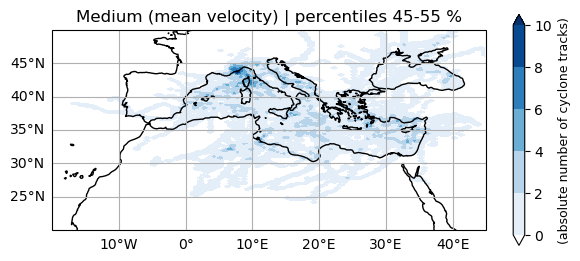

In [118]:
# Axes for binning
points_per_deg = 2
lon_bins = np.linspace(-20, 45, 65*points_per_deg+1)
lat_bins = np.linspace(20, 50, 70*points_per_deg+1)
bin_area = (lon_bins[1]-lon_bins[0])*(lat_bins[1]-lat_bins[0])
lon_bin_cents = (lon_bins[1::]+lon_bins[:-1:])/2
lat_bin_cents = (lat_bins[1::]+lat_bins[:-1:])/2

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-20, 45, 20, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)

# Computing 3D histogram
hist_datad = np.histogramdd((tracks_middle_m.lon,tracks_middle_m.lat,tracks_middle_m.id), bins=[lon_bins,lat_bins,np.unique(tracks_middle_m.id)])
# Eliminating duplicated storms and summing over different storms!!!
hist_data = np.transpose(np.sum((hist_datad[0]!=0),axis=2))
# Normalize by area and by total nr of storms in df_tracks (3190)
#hist_data = hist_data/3190*100*points_per_deg
#hist_data[hist_data==0]=np.NaN

## DEFINITIONS
# Fixed colorbar range (0 to 10) and 6 bins
fixed_vmin = 0
fixed_vmax = 10
norm = mcolors.Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
# Define fixed contour levels (6 bins from 0 to 10)
contour_levels = np.linspace(fixed_vmin, fixed_vmax, 6)  # 6 bins
# Create the colormap (first white, then the rest of the blues)
cmap = mcolors.ListedColormap(['white'] + [plt.cm.Blues(i) for i in range(1, plt.cm.Blues.N)])

# Plotting the contour plot
h2 = ax.contourf(
    lon_bin_cents, lat_bin_cents, hist_data, contour_levels,
    norm=norm, cmap=cmap, extend='both', transform=ccrs.PlateCarree(), zorder=0)

# Add colorbar with 10 bins and fixed range
cbar = fig.colorbar(h2, ax=ax, ticks=contour_levels)
cbar.set_label('(absolute number of cyclone tracks)', fontsize=9)

ax.set_title('Medium (mean velocity) | percentiles 45-55 %', fontsize=12)
g1 = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
g1.top_labels = False
g1.right_labels = False
fig.set_size_inches(7,3)
fig.savefig(fig_dir+'track_density_middle_m.png', dpi=500)

#### Slow

In [119]:
tracks_slow_m

id     lon     lat  year  month  day  time      hPa  medi_track
537        9   1.500  43.000  1979      2    2    13   999.91        True
538        9   1.850  42.805  1979      2    2    14  1000.11        True
539        9   2.190  42.606  1979      2    2    15  1000.94        True
540        9   2.514  42.439  1979      2    2    16  1001.03        True
541        9   2.878  42.331  1979      2    2    17  1000.72        True
...      ...     ...     ...   ...    ...  ...   ...      ...         ...
166773  2377  24.529  26.431  2005      7   27     6  1007.36        True
166774  2377  24.613  26.307  2005      7   27     7  1007.55        True
166775  2377  24.704  26.195  2005      7   27     8  1007.57        True
166776  2377  24.825  26.083  2005      7   27     9  1007.47        True
166777  2377  24.960  25.970  2005      7   27    10  1007.24        True

[10529 rows x 9 columns]

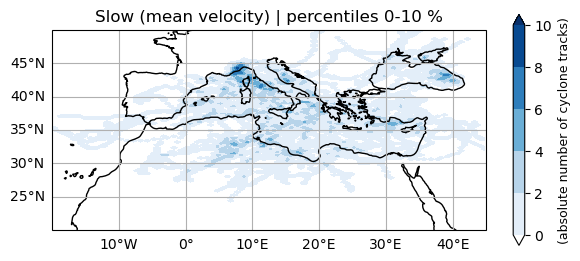

In [120]:
# Axes for binning
points_per_deg = 2
lon_bins = np.linspace(-20, 45, 65*points_per_deg+1)
lat_bins = np.linspace(20, 50, 70*points_per_deg+1)
bin_area = (lon_bins[1]-lon_bins[0])*(lat_bins[1]-lat_bins[0])
lon_bin_cents = (lon_bins[1::]+lon_bins[:-1:])/2
lat_bin_cents = (lat_bins[1::]+lat_bins[:-1:])/2

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-20, 45, 20, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)

# Computing 3D histogram
hist_datad = np.histogramdd((tracks_slow_m.lon,tracks_slow_m.lat,tracks_slow_m.id), bins=[lon_bins,lat_bins,np.unique(tracks_slow_m.id)])
# Eliminating duplicated storms and summing over different storms!!!
hist_data = np.transpose(np.sum((hist_datad[0]!=0),axis=2))
# Normalize by area and by total nr of storms in df_tracks (3190)
#hist_data = hist_data/3190*100*points_per_deg
#hist_data[hist_data==0]=np.NaN

## DEFINITIONS
# Fixed colorbar range (0 to 10) and 6 bins
fixed_vmin = 0
fixed_vmax = 10
norm = mcolors.Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
# Define fixed contour levels (6 bins from 0 to 10)
contour_levels = np.linspace(fixed_vmin, fixed_vmax, 6)  # 6 bins
# Create the colormap (first white, then the rest of the blues)
cmap = mcolors.ListedColormap(['white'] + [plt.cm.Blues(i) for i in range(1, plt.cm.Blues.N)])

# Plotting the contour plot
h2 = ax.contourf(
    lon_bin_cents, lat_bin_cents, hist_data, contour_levels,
    norm=norm, cmap=cmap, extend='both', transform=ccrs.PlateCarree(), zorder=0)

# Add colorbar with 10 bins and fixed range
cbar = fig.colorbar(h2, ax=ax, ticks=contour_levels)
cbar.set_label('(absolute number of cyclone tracks)', fontsize=9)

ax.set_title('Slow (mean velocity) | percentiles 0-10 %', fontsize=12)
g1 = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
g1.top_labels = False
g1.right_labels = False
fig.set_size_inches(7,3)
fig.savefig(fig_dir+'track_density_slow_m.png', dpi=500)

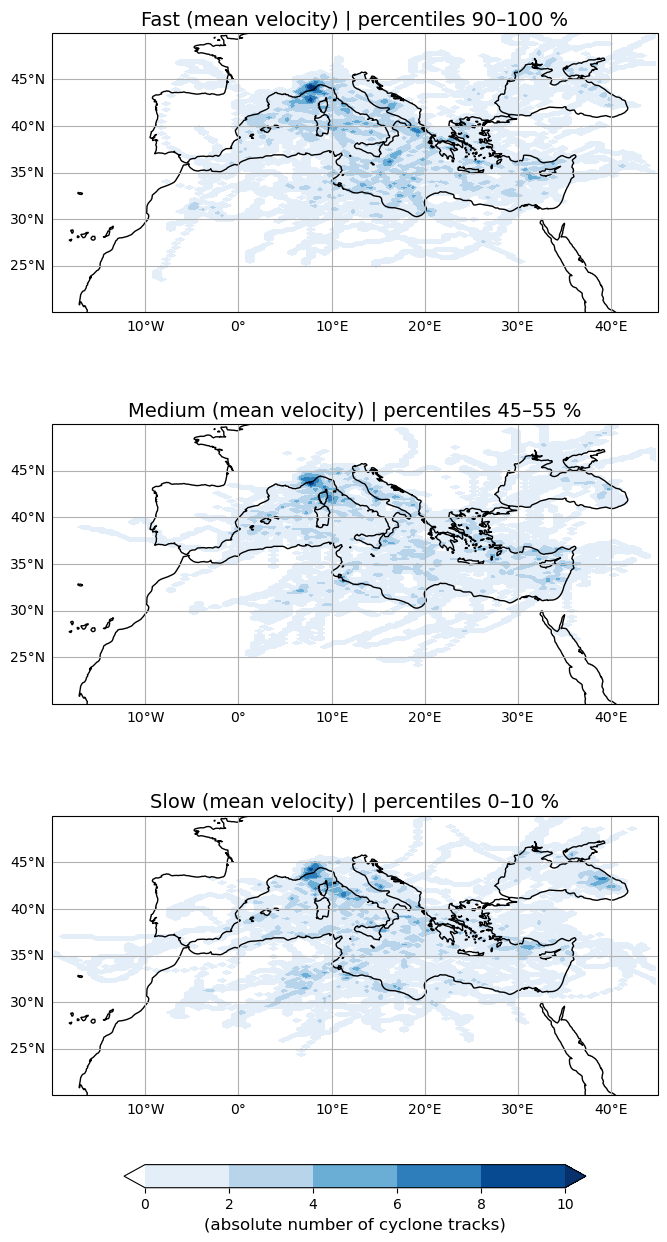

In [121]:
# Axes for binning
points_per_deg = 2
lon_bins = np.linspace(-20, 45, 65*points_per_deg+1)
lat_bins = np.linspace(20, 50, 70*points_per_deg+1)
bin_area = (lon_bins[1]-lon_bins[0])*(lat_bins[1]-lat_bins[0])
lon_bin_cents = (lon_bins[1::]+lon_bins[:-1:])/2
lat_bin_cents = (lat_bins[1::]+lat_bins[:-1:])/2

# Create a figure with 3 subplots arranged vertically
fig, axes = plt.subplots(3, 1, figsize=(8, 12), subplot_kw={'projection': ccrs.PlateCarree()})
fig.subplots_adjust(hspace=0.4)  # Adjust space between subplots

# Define colorbar parameters
fixed_vmin = 0
fixed_vmax = 10
norm = mcolors.Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
contour_levels = np.linspace(fixed_vmin, fixed_vmax, 6)  # 6 bins
cmap = mcolors.ListedColormap(['white'] + [plt.cm.Blues(i) for i in range(1, plt.cm.Blues.N)])

# Define the datasets and corresponding titles
datasets = [tracks_fast_m, tracks_middle_m, tracks_slow_m]
titles = ['Fast (mean velocity) | percentiles 90–100 %', 
          'Medium (mean velocity) | percentiles 45–55 %', 
          'Slow (mean velocity) | percentiles 0–10 %']

# Loop through each subplot, plot the histogram data, and add the colorbar
for i, (ax, dataset) in enumerate(zip(axes, datasets)):
    # Computing 3D histogram for the dataset
    hist_datad = np.histogramdd((dataset.lon, dataset.lat, dataset.id), bins=[lon_bins, lat_bins, np.unique(dataset.id)])
    hist_data = np.transpose(np.sum((hist_datad[0] != 0), axis=2))

    # Plotting the contour plot for each subplot
    h2 = ax.contourf(
        lon_bin_cents, lat_bin_cents, hist_data, contour_levels,
        norm=norm, cmap=cmap, extend='both', transform=ccrs.PlateCarree(), zorder=0
    )

    ax.set_extent([-20, 45, 20, 50], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.set_title(titles[i], fontsize=14)
    g1 = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    g1.top_labels = False
    g1.right_labels = False

# Add colorbar for the contour levels at the bottom
cbar = fig.colorbar(h2, ax=axes, orientation='horizontal', fraction=0.02, pad=0.06, ticks=contour_levels)
cbar.set_label('(absolute number of cyclone tracks)', fontsize=12)

# Set figure size and save
fig.set_size_inches(8, 15)
fig.savefig(fig_dir+'track_density_meavel.png', dpi=500)

## Along-track Stationarity (AT)

### 12-hour Distance (coordinates of reference points)

#### 10% longest (12-hour Distances)

In [122]:
tracks_long12_ref

id     lon     lat  year  month  day  time      hPa  medi_track
283        5  23.999  40.097  1979      1   13     6   998.40        True
284        5  24.068  40.100  1979      1   13     7   998.65        True
285        5  24.259  40.225  1979      1   13     8   998.57        True
286        5  24.612  40.447  1979      1   13     9   998.66        True
287        5  25.063  40.713  1979      1   13    10   997.74        True
...      ...     ...     ...   ...    ...  ...   ...      ...         ...
267004  3802  13.939  39.159  2020     12   27     1  1006.62        True
267035  3803  24.247  40.004  2020      2    5     7   989.47        True
267036  3803  24.444  39.859  2020      2    5     8   989.43        True
267151  3806  10.720  38.010  2020      3    4     2  1004.28        True
267152  3806  11.326  37.684  2020      3    4     3  1003.66        True

[14532 rows x 9 columns]

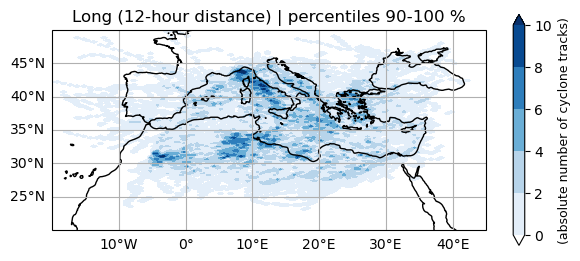

In [123]:
# Axes for binning
points_per_deg = 2
lon_bins = np.linspace(-20, 45, 65*points_per_deg+1)
lat_bins = np.linspace(20, 50, 70*points_per_deg+1)
bin_area = (lon_bins[1]-lon_bins[0])*(lat_bins[1]-lat_bins[0])
lon_bin_cents = (lon_bins[1::]+lon_bins[:-1:])/2
lat_bin_cents = (lat_bins[1::]+lat_bins[:-1:])/2

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-20, 45, 20, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)

# Computing 3D histogram
hist_datad = np.histogramdd((tracks_long12_ref.lon,tracks_long12_ref.lat,tracks_long12_ref.id), bins=[lon_bins,lat_bins,np.unique(tracks_long12_ref.id)])
# Eliminating duplicated storms and summing over different storms!!!
hist_data = np.transpose(np.sum((hist_datad[0]!=0),axis=2))
# Normalize by area and by total nr of storms in df_tracks (3190)
#hist_data = hist_data/3190*100*points_per_deg
#hist_data[hist_data==0]=np.NaN

#Definitions
# Fixed colorbar range (0 to 100) and 10 bins
fixed_vmin = 0
fixed_vmax = 10
norm = mcolors.Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
# Define fixed contour levels (10 bins from 0 to 100)
contour_levels = np.linspace(fixed_vmin, fixed_vmax, 6)  # 10 bins
# Create the colormap (first white, then the rest of the blues)
cmap = mcolors.ListedColormap(['white'] + [plt.cm.Blues(i) for i in range(1, plt.cm.Blues.N)])

# Plotting the contour plot
h2 = ax.contourf(
    lon_bin_cents, lat_bin_cents, hist_data, contour_levels,
    norm=norm, cmap=cmap, extend='both', transform=ccrs.PlateCarree(), zorder=0
)

# Add colorbar with 10 bins and fixed range
cbar = fig.colorbar(h2, ax=ax, ticks=contour_levels)
cbar.set_label('(absolute number of cyclone tracks)', fontsize=9)

ax.set_title('Long (12-hour distance) | percentiles 90-100 %', fontsize=12)
g1 = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
g1.top_labels = False
g1.right_labels = False
fig.set_size_inches(7,3)
fig.savefig(fig_dir+'track_density_long12_ref.png',dpi=500)

#### 10% around median (12-hour Distances)

In [124]:
tracks_midi12_ref

id     lon     lat  year  month  day  time      hPa  medi_track
262        4  12.826  43.006  1979      1   10     3  1002.50        True
390        6  32.597  42.329  1979      1   19     3  1010.14        True
556        9   8.672  42.149  1979      2    3     8  1002.37        True
557        9   9.075  42.166  1979      2    3     9  1002.80        True
559        9   9.348  42.077  1979      2    3    11  1003.34        True
...      ...     ...     ...   ...    ...  ...   ...      ...         ...
267119  3805  41.219  42.286  2020      6   18     5  1005.31        True
267121  3805  41.578  42.300  2020      6   18     7  1004.59        True
267122  3805  41.506  42.349  2020      6   18     8  1004.15        True
267129  3805  40.004  42.989  2020      6   18    15  1003.34        True
267199  3807  31.850  43.880  2020      9    4     5  1012.16        True

[14541 rows x 9 columns]

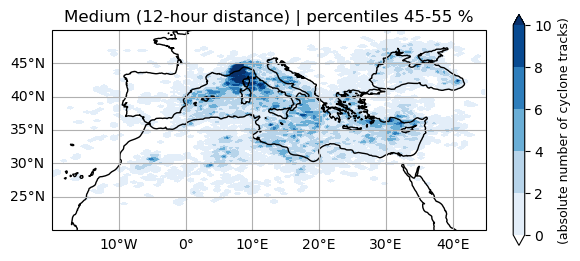

In [125]:
# Axes for binning
points_per_deg = 2
lon_bins = np.linspace(-20, 45, 65*points_per_deg+1)
lat_bins = np.linspace(20, 50, 70*points_per_deg+1)
bin_area = (lon_bins[1]-lon_bins[0])*(lat_bins[1]-lat_bins[0])
lon_bin_cents = (lon_bins[1::]+lon_bins[:-1:])/2
lat_bin_cents = (lat_bins[1::]+lat_bins[:-1:])/2

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-20, 45, 20, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)

# Computing 3D histogram
hist_datad = np.histogramdd((tracks_midi12_ref.lon,tracks_midi12_ref.lat,tracks_midi12_ref.id), bins=[lon_bins,lat_bins,np.unique(tracks_midi12_ref.id)])
# Eliminating duplicated storms and summing over different storms!!!
hist_data = np.transpose(np.sum((hist_datad[0]!=0),axis=2))
# Normalize by area and by total nr of storms in df_tracks (3190)
#hist_data = hist_data/3190*100*points_per_deg
#hist_data[hist_data==0]=np.NaN

#Definitions
# Fixed colorbar range (0 to 100) and 10 bins
fixed_vmin = 0
fixed_vmax = 10
norm = mcolors.Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
# Define fixed contour levels (10 bins from 0 to 100)
contour_levels = np.linspace(fixed_vmin, fixed_vmax, 6)  # 10 bins
# Create the colormap (first white, then the rest of the blues)
cmap = mcolors.ListedColormap(['white'] + [plt.cm.Blues(i) for i in range(1, plt.cm.Blues.N)])

# Plotting the contour plot
h2 = ax.contourf(
    lon_bin_cents, lat_bin_cents, hist_data, contour_levels,
    norm=norm, cmap=cmap, extend='both', transform=ccrs.PlateCarree(), zorder=0
)

# Add colorbar with 10 bins and fixed range
cbar = fig.colorbar(h2, ax=ax, ticks=contour_levels)
cbar.set_label('(absolute number of cyclone tracks)', fontsize=9)

ax.set_title('Medium (12-hour distance) | percentiles 45-55 %', fontsize=12)
g1 = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
g1.top_labels = False
g1.right_labels = False
fig.set_size_inches(7,3)
fig.savefig(fig_dir+'track_density_midi12_ref.png', dpi=500)

#### 10% shortest (12-hour Distances)

In [126]:
tracks_short12_ref

id     lon     lat  year  month  day  time      hPa  medi_track
396        6  31.771  43.031  1979      1   19     9  1011.82        True
397        6  31.550  43.123  1979      1   19    10  1011.93        True
398        6  31.488  43.223  1979      1   19    11  1011.75        True
399        6  31.475  43.314  1979      1   19    12  1012.02        True
400        6  31.471  43.387  1979      1   19    13  1012.10        True
...      ...     ...     ...   ...    ...  ...   ...      ...         ...
267274  3807  36.816  44.284  2020      9    7     8  1013.71        True
267275  3807  36.798  44.283  2020      9    7     9  1013.85        True
267276  3807  36.780  44.265  2020      9    7    10  1014.34        True
267277  3807  36.763  44.237  2020      9    7    11  1014.40        True
267278  3807  36.739  44.191  2020      9    7    12  1013.98        True

[14572 rows x 9 columns]

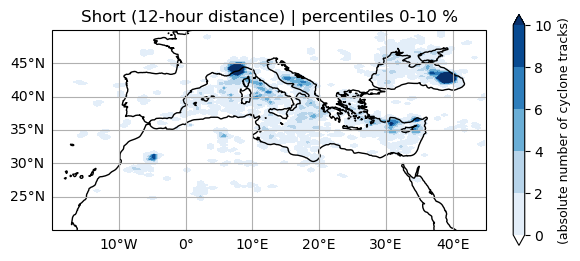

In [127]:
# Axes for binning
points_per_deg = 2
lon_bins = np.linspace(-20, 45, 65*points_per_deg+1)
lat_bins = np.linspace(20, 50, 70*points_per_deg+1)
bin_area = (lon_bins[1]-lon_bins[0])*(lat_bins[1]-lat_bins[0])
lon_bin_cents = (lon_bins[1::]+lon_bins[:-1:])/2
lat_bin_cents = (lat_bins[1::]+lat_bins[:-1:])/2

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-20, 45, 20, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)

# Computing 3D histogram
hist_datad = np.histogramdd((tracks_short12_ref.lon,tracks_short12_ref.lat,tracks_short12_ref.id), bins=[lon_bins,lat_bins,np.unique(tracks_short12_ref.id)])
# Eliminating duplicated storms and summing over different storms!!!
hist_data = np.transpose(np.sum((hist_datad[0]!=0),axis=2))
# Normalize by area and by total nr of storms in df_tracks (3190)
#hist_data = hist_data/3190*100*points_per_deg
#hist_data[hist_data==0]=np.NaN

#Definitions
# Fixed colorbar range (0 to 100) and 10 bins
fixed_vmin = 0
fixed_vmax = 10
norm = mcolors.Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
# Define fixed contour levels (10 bins from 0 to 100)
contour_levels = np.linspace(fixed_vmin, fixed_vmax, 6)  # 10 bins
# Create the colormap (first white, then the rest of the blues)
cmap = mcolors.ListedColormap(['white'] + [plt.cm.Blues(i) for i in range(1, plt.cm.Blues.N)])

# Plotting the contour plot
h2 = ax.contourf(
    lon_bin_cents, lat_bin_cents, hist_data, contour_levels,
    norm=norm, cmap=cmap, extend='both', transform=ccrs.PlateCarree(), zorder=0
)

# Add colorbar with 10 bins and fixed range
cbar = fig.colorbar(h2, ax=ax, ticks=contour_levels)
cbar.set_label('(absolute number of cyclone tracks)', fontsize=9)

ax.set_title('Short (12-hour distance) | percentiles 0-10 %', fontsize=12)
g1 = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
g1.top_labels = False
g1.right_labels = False
fig.set_size_inches(7,3)
fig.savefig(fig_dir+'track_density_short12_ref.png', dpi=500)

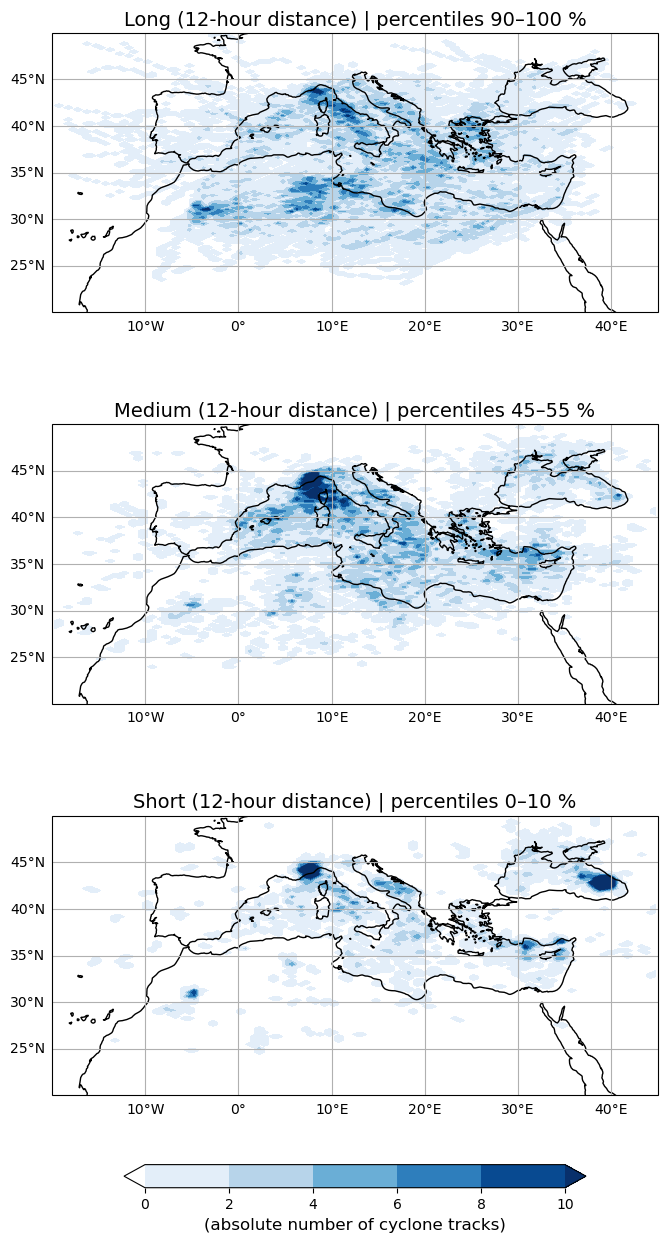

In [128]:
# ALL THREE
# Axes for binning
points_per_deg = 2
lon_bins = np.linspace(-20, 45, 65*points_per_deg+1)
lat_bins = np.linspace(20, 50, 70*points_per_deg+1)
bin_area = (lon_bins[1]-lon_bins[0])*(lat_bins[1]-lat_bins[0])
lon_bin_cents = (lon_bins[1::]+lon_bins[:-1:])/2
lat_bin_cents = (lat_bins[1::]+lat_bins[:-1:])/2

# Create a figure with 3 subplots arranged vertically
fig, axes = plt.subplots(3, 1, figsize=(8, 15), subplot_kw={'projection': ccrs.PlateCarree()})
fig.subplots_adjust(hspace=0.4)  # Adjust space between subplots

# Define colorbar parameters
fixed_vmin = 0
fixed_vmax = 10
norm = mcolors.Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
contour_levels = np.linspace(fixed_vmin, fixed_vmax, 6)  # 6 bins
cmap = mcolors.ListedColormap(['white'] + [plt.cm.Blues(i) for i in range(1, plt.cm.Blues.N)])

# Define the datasets and corresponding titles
datasets = [tracks_long12_ref, tracks_midi12_ref, tracks_short12_ref]
titles = ['Long (12-hour distance) | percentiles 90–100 %', 
          'Medium (12-hour distance) | percentiles 45–55 %', 
          'Short (12-hour distance) | percentiles 0–10 %']

# Loop through each subplot, plot the histogram data, and add the colorbar
for i, (ax, dataset) in enumerate(zip(axes, datasets)):
    # Computing 3D histogram for the dataset
    hist_datad = np.histogramdd((dataset.lon, dataset.lat, dataset.id), bins=[lon_bins, lat_bins, np.unique(dataset.id)])
    hist_data = np.transpose(np.sum((hist_datad[0] != 0), axis=2))

    # Plotting the contour plot for each subplot
    h2 = ax.contourf(
        lon_bin_cents, lat_bin_cents, hist_data, contour_levels,
        norm=norm, cmap=cmap, extend='both', transform=ccrs.PlateCarree(), zorder=0
    )

    ax.set_extent([-20, 45, 20, 50], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.set_title(titles[i], fontsize=14)
    g1 = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    g1.top_labels = False
    g1.right_labels = False

# Add colorbar for the contour levels at the bottom
cbar = fig.colorbar(h2, ax=axes, orientation='horizontal', fraction=0.02, pad=0.06, ticks=contour_levels)
cbar.set_label('(absolute number of cyclone tracks)', fontsize=12)

# Set figure size and save
fig.set_size_inches(8, 15)
fig.savefig(fig_dir+'track_density_12.png', dpi=500)

### Radial Distance (coordinates of reference points)

#### 10% longest (radial-distances)

In [129]:
tracks_longrad_ref

id     lon     lat  year  month  day  time      hPa  medi_track
257        4  10.262  42.273  1979      1    9    22  1003.12        True
284        5  24.068  40.100  1979      1   13     7   998.65        True
285        5  24.259  40.225  1979      1   13     8   998.57        True
286        5  24.612  40.447  1979      1   13     9   998.66        True
287        5  25.063  40.713  1979      1   13    10   997.74        True
...      ...     ...     ...   ...    ...  ...   ...      ...         ...
267152  3806  11.326  37.684  2020      3    4     3  1003.66        True
267153  3806  11.856  37.428  2020      3    4     4  1003.69        True
267154  3806  12.315  37.225  2020      3    4     5  1003.49        True
267155  3806  12.732  37.042  2020      3    4     6  1004.00        True
267156  3806  13.148  36.858  2020      3    4     7  1004.54        True

[14534 rows x 9 columns]

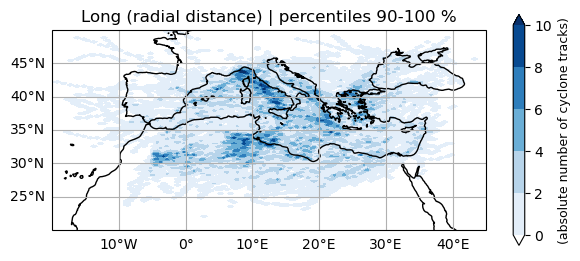

In [130]:
# Axes for binning
points_per_deg = 2
lon_bins = np.linspace(-20, 45, 65*points_per_deg+1)
lat_bins = np.linspace(20, 50, 70*points_per_deg+1)
bin_area = (lon_bins[1]-lon_bins[0])*(lat_bins[1]-lat_bins[0])
lon_bin_cents = (lon_bins[1::]+lon_bins[:-1:])/2
lat_bin_cents = (lat_bins[1::]+lat_bins[:-1:])/2

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-20, 45, 20, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)

# Computing 3D histogram
hist_datad = np.histogramdd((tracks_longrad_ref.lon,tracks_longrad_ref.lat,tracks_longrad_ref.id), bins=[lon_bins,lat_bins,np.unique(tracks_longrad_ref.id)])
# Eliminating duplicated storms and summing over different storms!!!
hist_data = np.transpose(np.sum((hist_datad[0]!=0),axis=2))
# Normalize by area and by total nr of storms in df_tracks (3190)
#hist_data = hist_data/3190*100*points_per_deg
#hist_data[hist_data==0]=np.NaN

#Definitions
# Fixed colorbar range (0 to 100) and 10 bins
fixed_vmin = 0
fixed_vmax = 10
norm = mcolors.Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
# Define fixed contour levels (10 bins from 0 to 100)
contour_levels = np.linspace(fixed_vmin, fixed_vmax, 6)  # 10 bins
# Create the colormap (first white, then the rest of the blues)
cmap = mcolors.ListedColormap(['white'] + [plt.cm.Blues(i) for i in range(1, plt.cm.Blues.N)])

# Plotting the contour plot
h2 = ax.contourf(
    lon_bin_cents, lat_bin_cents, hist_data, contour_levels,
    norm=norm, cmap=cmap, extend='both', transform=ccrs.PlateCarree(), zorder=0
)

# Add colorbar with 10 bins and fixed range
cbar = fig.colorbar(h2, ax=ax, ticks=contour_levels)
cbar.set_label('(absolute number of cyclone tracks)', fontsize=9)

ax.set_title('Long (radial distance) | percentiles 90-100 %', fontsize=12)
g1 = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
g1.top_labels = False
g1.right_labels = False
fig.set_size_inches(7,3)
fig.savefig(fig_dir+'track_density_longrad_ref.png', dpi=500)

#### 10% around median (radial-distances)

In [131]:
tracks_midirad_ref

id     lon     lat  year  month  day  time      hPa  medi_track
229        4   0.960  40.700  1979      1    8    18  1016.93        True
264        4  13.891  43.196  1979      1   10     5  1001.28        True
352        6  21.060  35.126  1979      1   17    13  1007.31        True
388        6  31.454  42.006  1979      1   19     1  1009.96        True
391        6  32.976  42.431  1979      1   19     4  1010.41        True
...      ...     ...     ...   ...    ...  ...   ...      ...         ...
267131  3805  39.434  43.304  2020      6   18    17  1003.92        True
267132  3805  39.233  43.430  2020      6   18    18  1004.13        True
267133  3805  39.023  43.542  2020      6   18    19  1004.13        True
267201  3807  32.288  44.295  2020      9    4     7  1011.94        True
267202  3807  32.531  44.484  2020      9    4     8  1011.40        True

[14543 rows x 9 columns]

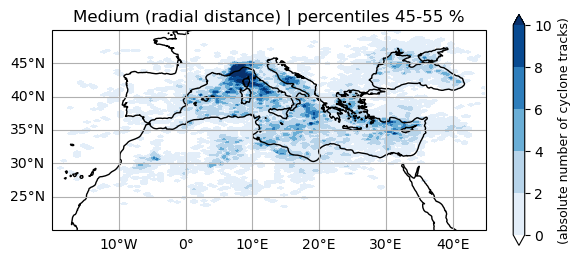

In [132]:
# Axes for binning
points_per_deg = 2
lon_bins = np.linspace(-20, 45, 65*points_per_deg+1)
lat_bins = np.linspace(20, 50, 70*points_per_deg+1)
bin_area = (lon_bins[1]-lon_bins[0])*(lat_bins[1]-lat_bins[0])
lon_bin_cents = (lon_bins[1::]+lon_bins[:-1:])/2
lat_bin_cents = (lat_bins[1::]+lat_bins[:-1:])/2

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-20, 45, 20, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)

# Computing 3D histogram
hist_datad = np.histogramdd((tracks_midirad_ref.lon,tracks_midirad_ref.lat,tracks_midirad_ref.id), bins=[lon_bins,lat_bins,np.unique(tracks_midirad_ref.id)])
# Eliminating duplicated storms and summing over different storms!!!
hist_data = np.transpose(np.sum((hist_datad[0]!=0),axis=2))
# Normalize by area and by total nr of storms in df_tracks (3190)
#hist_data = hist_data/3190*100*points_per_deg
#hist_data[hist_data==0]=np.NaN

#Definitions
# Fixed colorbar range (0 to 100) and 10 bins
fixed_vmin = 0
fixed_vmax = 10
norm = mcolors.Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
# Define fixed contour levels (10 bins from 0 to 100)
contour_levels = np.linspace(fixed_vmin, fixed_vmax, 6)  # 10 bins
# Create the colormap (first white, then the rest of the blues)
cmap = mcolors.ListedColormap(['white'] + [plt.cm.Blues(i) for i in range(1, plt.cm.Blues.N)])

# Plotting the contour plot
h2 = ax.contourf(
    lon_bin_cents, lat_bin_cents, hist_data, contour_levels,
    norm=norm, cmap=cmap, extend='both', transform=ccrs.PlateCarree(), zorder=0
)

# Add colorbar with 10 bins and fixed range
cbar = fig.colorbar(h2, ax=ax, ticks=contour_levels)
cbar.set_label('(absolute number of cyclone tracks)', fontsize=9)

ax.set_title('Medium (radial distance) | percentiles 45-55 %', fontsize=12)
g1 = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
g1.top_labels = False
g1.right_labels = False
fig.set_size_inches(7,3)
fig.savefig(fig_dir+'track_density_midirad_ref.png', dpi=500)

#### 10% shortest (radial-distances)

In [133]:
tracks_shortrad_ref

id     lon     lat  year  month  day  time      hPa  medi_track
399        6  31.475  43.314  1979      1   19    12  1012.02        True
400        6  31.471  43.387  1979      1   19    13  1012.10        True
401        6  31.465  43.444  1979      1   19    14  1012.35        True
402        6  31.470  43.490  1979      1   19    15  1012.59        True
403        6  31.498  43.532  1979      1   19    16  1012.66        True
...      ...     ...     ...   ...    ...  ...   ...      ...         ...
267279  3807  36.717  44.154  2020      9    7    13  1013.74        True
267280  3807  36.709  44.151  2020      9    7    14  1013.52        True
267281  3807  36.713  44.170  2020      9    7    15  1014.04        True
267283  3807  36.636  44.163  2020      9    7    17  1015.08        True
267284  3807  36.497  44.146  2020      9    7    18  1015.68        True

[14570 rows x 9 columns]

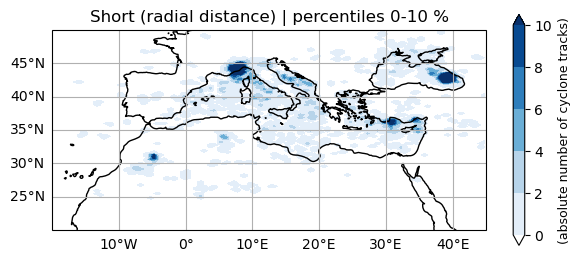

In [134]:
# Axes for binning
points_per_deg = 2
lon_bins = np.linspace(-20, 45, 65*points_per_deg+1)
lat_bins = np.linspace(20, 50, 70*points_per_deg+1)
bin_area = (lon_bins[1]-lon_bins[0])*(lat_bins[1]-lat_bins[0])
lon_bin_cents = (lon_bins[1::]+lon_bins[:-1:])/2
lat_bin_cents = (lat_bins[1::]+lat_bins[:-1:])/2

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-20, 45, 20, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)

# Computing 3D histogram
hist_datad = np.histogramdd((tracks_shortrad_ref.lon,tracks_shortrad_ref.lat,tracks_shortrad_ref.id), bins=[lon_bins,lat_bins,np.unique(tracks_shortrad_ref.id)])
# Eliminating duplicated storms and summing over different storms!!!
hist_data = np.transpose(np.sum((hist_datad[0]!=0),axis=2))
# Normalize by area and by total nr of storms in df_tracks (3190)
#hist_data = hist_data/3190*100*points_per_deg
#hist_data[hist_data==0]=np.NaN

#Definitions
# Fixed colorbar range (0 to 100) and 10 bins
fixed_vmin = 0
fixed_vmax = 10
norm = mcolors.Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
# Define fixed contour levels (10 bins from 0 to 100)
contour_levels = np.linspace(fixed_vmin, fixed_vmax, 6)  # 10 bins
# Create the colormap (first white, then the rest of the blues)
cmap = mcolors.ListedColormap(['white'] + [plt.cm.Blues(i) for i in range(1, plt.cm.Blues.N)])

# Plotting the contour plot
h2 = ax.contourf(
    lon_bin_cents, lat_bin_cents, hist_data, contour_levels,
    norm=norm, cmap=cmap, extend='both', transform=ccrs.PlateCarree(), zorder=0
)

# Add colorbar with 10 bins and fixed range
cbar = fig.colorbar(h2, ax=ax, ticks=contour_levels)
cbar.set_label('(absolute number of cyclone tracks)', fontsize=9)

ax.set_title('Short (radial distance) | percentiles 0-10 %', fontsize=12)
g1 = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
g1.top_labels = False
g1.right_labels = False
fig.set_size_inches(7,3)
fig.savefig(fig_dir+'track_density_shortrad_ref.png', dpi=500)

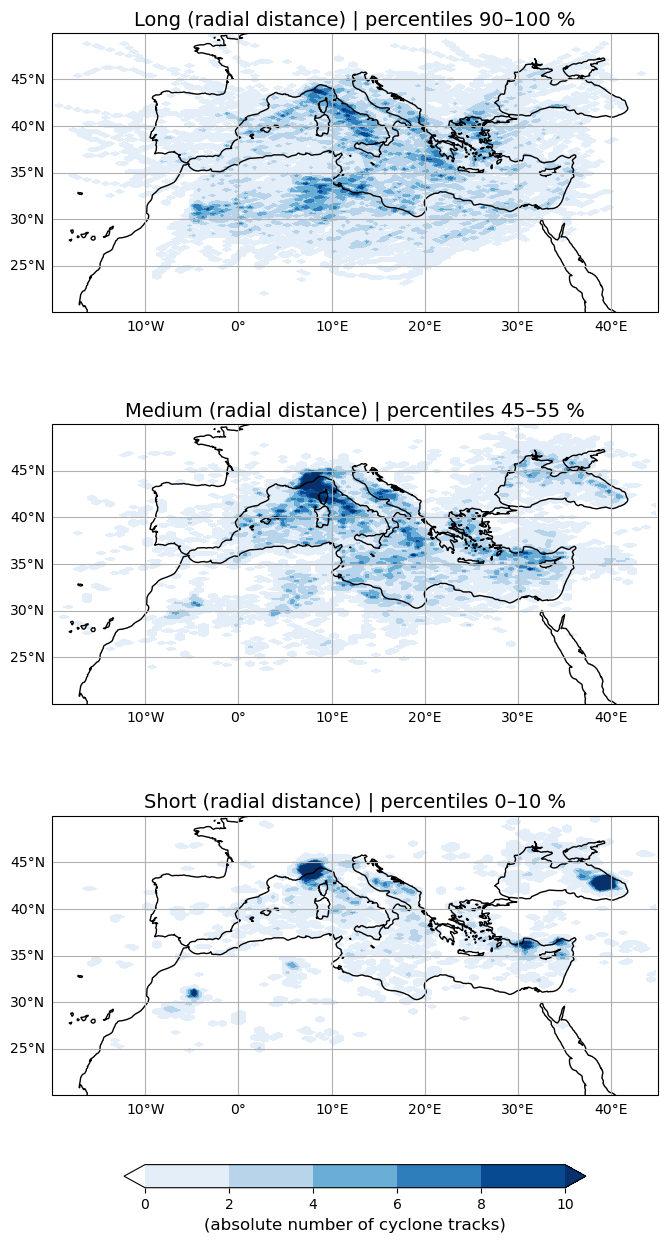

In [135]:
# ALL THREE
# Axes for binning
points_per_deg = 2
lon_bins = np.linspace(-20, 45, 65*points_per_deg+1)
lat_bins = np.linspace(20, 50, 70*points_per_deg+1)
bin_area = (lon_bins[1]-lon_bins[0])*(lat_bins[1]-lat_bins[0])
lon_bin_cents = (lon_bins[1::]+lon_bins[:-1:])/2
lat_bin_cents = (lat_bins[1::]+lat_bins[:-1:])/2

# Create a figure with 3 subplots arranged vertically
fig, axes = plt.subplots(3, 1, figsize=(8, 15), subplot_kw={'projection': ccrs.PlateCarree()})
fig.subplots_adjust(hspace=0.4)  # Adjust space between subplots

# Define colorbar parameters
fixed_vmin = 0
fixed_vmax = 10
norm = mcolors.Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
contour_levels = np.linspace(fixed_vmin, fixed_vmax, 6)  # 6 bins
cmap = mcolors.ListedColormap(['white'] + [plt.cm.Blues(i) for i in range(1, plt.cm.Blues.N)])

# Define the datasets and corresponding titles
datasets = [tracks_longrad_ref, tracks_midirad_ref, tracks_shortrad_ref]
titles = ['Long (radial distance) | percentiles 90–100 %', 
          'Medium (radial distance) | percentiles 45–55 %', 
          'Short (radial distance) | percentiles 0–10 %']

# Loop through each subplot, plot the histogram data, and add the colorbar
for i, (ax, dataset) in enumerate(zip(axes, datasets)):
    # Computing 3D histogram for the dataset
    hist_datad = np.histogramdd((dataset.lon, dataset.lat, dataset.id), bins=[lon_bins, lat_bins, np.unique(dataset.id)])
    hist_data = np.transpose(np.sum((hist_datad[0] != 0), axis=2))

    # Plotting the contour plot for each subplot
    h2 = ax.contourf(
        lon_bin_cents, lat_bin_cents, hist_data, contour_levels,
        norm=norm, cmap=cmap, extend='both', transform=ccrs.PlateCarree(), zorder=0
    )

    ax.set_extent([-20, 45, 20, 50], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.set_title(titles[i], fontsize=14)
    g1 = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    g1.top_labels = False
    g1.right_labels = False

# Add colorbar for the contour levels at the bottom
cbar = fig.colorbar(h2, ax=axes, orientation='horizontal', fraction=0.02, pad=0.06, ticks=contour_levels)
cbar.set_label('(absolute number of cyclone tracks)', fontsize=12)

# Set figure size and save
fig.set_size_inches(8, 15)
fig.savefig(fig_dir+'track_density_rad.png', dpi=500)

### Smallest Circle (coordinates of reference points)

#### 10% biggest (smallest cirlce)

In [136]:
tracks_bigcircle_ref

id     lon     lat  year  month  day  time      hPa  medi_track
250        4   7.113  41.532  1979      1    9    15  1007.07        True
251        4   7.591  41.600  1979      1    9    16  1006.53        True
252        4   8.088  41.701  1979      1    9    17  1006.14        True
253        4   8.589  41.813  1979      1    9    18  1005.48        True
254        4   9.052  41.910  1979      1    9    19  1005.24        True
...      ...     ...     ...   ...    ...  ...   ...      ...         ...
266594  3797  11.885  41.054  2020     12    3     4  1005.40        True
267036  3803  24.444  39.859  2020      2    5     8   989.43        True
267151  3806  10.720  38.010  2020      3    4     2  1004.28        True
267152  3806  11.326  37.684  2020      3    4     3  1003.66        True
267153  3806  11.856  37.428  2020      3    4     4  1003.69        True

[14530 rows x 9 columns]

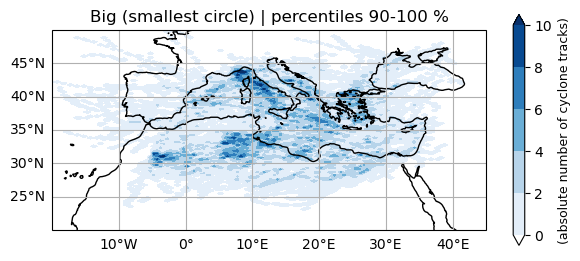

In [137]:
# Axes for binning
points_per_deg = 2
lon_bins = np.linspace(-20, 45, 65*points_per_deg+1)
lat_bins = np.linspace(20, 50, 70*points_per_deg+1)
bin_area = (lon_bins[1]-lon_bins[0])*(lat_bins[1]-lat_bins[0])
lon_bin_cents = (lon_bins[1::]+lon_bins[:-1:])/2
lat_bin_cents = (lat_bins[1::]+lat_bins[:-1:])/2

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-20, 45, 20, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)

# Computing 3D histogram
hist_datad = np.histogramdd((tracks_bigcircle_ref.lon,tracks_bigcircle_ref.lat,tracks_bigcircle_ref.id), bins=[lon_bins,lat_bins,np.unique(tracks_bigcircle_ref.id)])
# Eliminating duplicated storms and summing over different storms!!!
hist_data = np.transpose(np.sum((hist_datad[0]!=0),axis=2))
# Normalize by area and by total nr of storms in df_tracks (3190)
#hist_data = hist_data/3190*100*points_per_deg
#hist_data[hist_data==0]=np.NaN

#Definitions
# Fixed colorbar range (0 to 100) and 10 bins
fixed_vmin = 0
fixed_vmax = 10
norm = mcolors.Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
# Define fixed contour levels (10 bins from 0 to 100)
contour_levels = np.linspace(fixed_vmin, fixed_vmax, 6)  # 10 bins
# Create the colormap (first white, then the rest of the blues)
cmap = mcolors.ListedColormap(['white'] + [plt.cm.Blues(i) for i in range(1, plt.cm.Blues.N)])

# Plotting the contour plot
h2 = ax.contourf(
    lon_bin_cents, lat_bin_cents, hist_data, contour_levels,
    norm=norm, cmap=cmap, extend='both', transform=ccrs.PlateCarree(), zorder=0
)

# Add colorbar with 10 bins and fixed range
cbar = fig.colorbar(h2, ax=ax, ticks=contour_levels)
cbar.set_label('(absolute number of cyclone tracks)', fontsize=9)

ax.set_title('Big (smallest circle) | percentiles 90-100 %', fontsize=12)
g1 = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
g1.top_labels = False
g1.right_labels = False
fig.set_size_inches(7,3)
fig.savefig(fig_dir+'track_density_bigcircle_ref.png', dpi=500)

#### 10% around median (smallest circle)

In [138]:
tracks_midicircle_ref

id     lon     lat  year  month  day  time      hPa  medi_track
340        6  23.542  34.368  1979      1   17     1  1008.05        True
349        6  23.272  35.672  1979      1   17    10  1007.09        True
387        6  30.835  41.806  1979      1   19     0  1010.15        True
434        6  32.167  43.095  1979      1   20    23  1017.26        True
556        9   8.672  42.149  1979      2    3     8  1002.37        True
...      ...     ...     ...   ...    ...  ...   ...      ...         ...
267121  3805  41.578  42.300  2020      6   18     7  1004.59        True
267129  3805  40.004  42.989  2020      6   18    15  1003.34        True
267130  3805  39.685  43.150  2020      6   18    16  1003.65        True
267199  3807  31.850  43.880  2020      9    4     5  1012.16        True
267200  3807  32.040  44.071  2020      9    4     6  1012.22        True

[14538 rows x 9 columns]

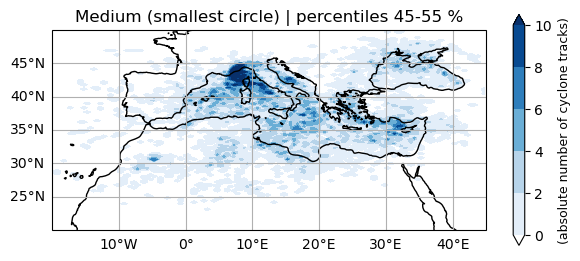

In [139]:
# Axes for binning
points_per_deg = 2
lon_bins = np.linspace(-20, 45, 65*points_per_deg+1)
lat_bins = np.linspace(20, 50, 70*points_per_deg+1)
bin_area = (lon_bins[1]-lon_bins[0])*(lat_bins[1]-lat_bins[0])
lon_bin_cents = (lon_bins[1::]+lon_bins[:-1:])/2
lat_bin_cents = (lat_bins[1::]+lat_bins[:-1:])/2

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-20, 45, 20, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)

# Computing 3D histogram
hist_datad = np.histogramdd((tracks_midicircle_ref.lon,tracks_midicircle_ref.lat,tracks_midicircle_ref.id), bins=[lon_bins,lat_bins,np.unique(tracks_midicircle_ref.id)])
# Eliminating duplicated storms and summing over different storms!!!
hist_data = np.transpose(np.sum((hist_datad[0]!=0),axis=2))
# Normalize by area and by total nr of storms in df_tracks (3190)
#hist_data = hist_data/3190*100*points_per_deg
#hist_data[hist_data==0]=np.NaN

#Definitions
# Fixed colorbar range (0 to 100) and 10 bins
fixed_vmin = 0
fixed_vmax = 10
norm = mcolors.Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
# Define fixed contour levels (10 bins from 0 to 100)
contour_levels = np.linspace(fixed_vmin, fixed_vmax, 6)  # 10 bins
# Create the colormap (first white, then the rest of the blues)
cmap = mcolors.ListedColormap(['white'] + [plt.cm.Blues(i) for i in range(1, plt.cm.Blues.N)])

# Plotting the contour plot
h2 = ax.contourf(
    lon_bin_cents, lat_bin_cents, hist_data, contour_levels,
    norm=norm, cmap=cmap, extend='both', transform=ccrs.PlateCarree(), zorder=0
)

# Add colorbar with 10 bins and fixed range
cbar = fig.colorbar(h2, ax=ax, ticks=contour_levels)
cbar.set_label('(absolute number of cyclone tracks)', fontsize=9)

ax.set_title('Medium (smallest circle) | percentiles 45-55 %', fontsize=12)
g1 = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
g1.top_labels = False
g1.right_labels = False
fig.set_size_inches(7,3)
fig.savefig(fig_dir+'track_density_midicircle_ref.png', dpi=500)

#### 10% smallest (smallest circle)

In [140]:
tracks_smallcircle_ref

id     lon     lat  year  month  day  time      hPa  medi_track
398        6  31.488  43.223  1979      1   19    11  1011.75        True
399        6  31.475  43.314  1979      1   19    12  1012.02        True
400        6  31.471  43.387  1979      1   19    13  1012.10        True
401        6  31.465  43.444  1979      1   19    14  1012.35        True
402        6  31.470  43.490  1979      1   19    15  1012.59        True
...      ...     ...     ...   ...    ...  ...   ...      ...         ...
267274  3807  36.816  44.284  2020      9    7     8  1013.71        True
267275  3807  36.798  44.283  2020      9    7     9  1013.85        True
267276  3807  36.780  44.265  2020      9    7    10  1014.34        True
267283  3807  36.636  44.163  2020      9    7    17  1015.08        True
267284  3807  36.497  44.146  2020      9    7    18  1015.68        True

[14571 rows x 9 columns]

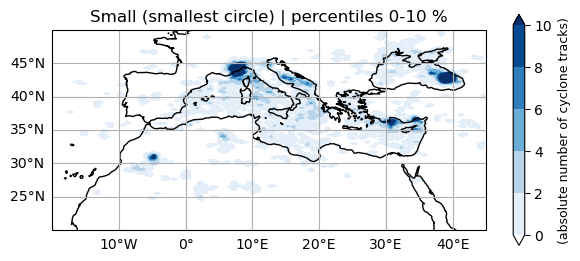

In [141]:
# Axes for binning
points_per_deg = 2
lon_bins = np.linspace(-20, 45, 65*points_per_deg+1)
lat_bins = np.linspace(20, 50, 70*points_per_deg+1)
bin_area = (lon_bins[1]-lon_bins[0])*(lat_bins[1]-lat_bins[0])
lon_bin_cents = (lon_bins[1::]+lon_bins[:-1:])/2
lat_bin_cents = (lat_bins[1::]+lat_bins[:-1:])/2

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-20, 45, 20, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)

# Computing 3D histogram
hist_datad = np.histogramdd((tracks_smallcircle_ref.lon,tracks_smallcircle_ref.lat,tracks_smallcircle_ref.id), bins=[lon_bins,lat_bins,np.unique(tracks_smallcircle_ref.id)])
# Eliminating duplicated storms and summing over different storms!!!
hist_data = np.transpose(np.sum((hist_datad[0]!=0),axis=2))
# Normalize by area and by total nr of storms in df_tracks (3190)
#hist_data = hist_data/3190*100*points_per_deg
#hist_data[hist_data==0]=np.NaN

#Definitions
# Fixed colorbar range (0 to 100) and 10 bins
fixed_vmin = 0
fixed_vmax = 10
norm = mcolors.Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
# Define fixed contour levels (10 bins from 0 to 100)
contour_levels = np.linspace(fixed_vmin, fixed_vmax, 6)  # 10 bins
# Create the colormap (first white, then the rest of the blues)
cmap = mcolors.ListedColormap(['white'] + [plt.cm.Blues(i) for i in range(1, plt.cm.Blues.N)])

# Plotting the contour plot
h2 = ax.contourf(
    lon_bin_cents, lat_bin_cents, hist_data, contour_levels,
    norm=norm, cmap=cmap, extend='both', transform=ccrs.PlateCarree(), zorder=0
)

# Add colorbar with 10 bins and fixed range
cbar = fig.colorbar(h2, ax=ax, ticks=contour_levels)
cbar.set_label('(absolute number of cyclone tracks)', fontsize=9)

ax.set_title('Small (smallest circle) | percentiles 0-10 %', fontsize=12)
g1 = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
g1.top_labels = False
g1.right_labels = False
fig.set_size_inches(7,3)
fig.savefig(fig_dir+'track_density_smallcircle_ref.png', dpi=500)

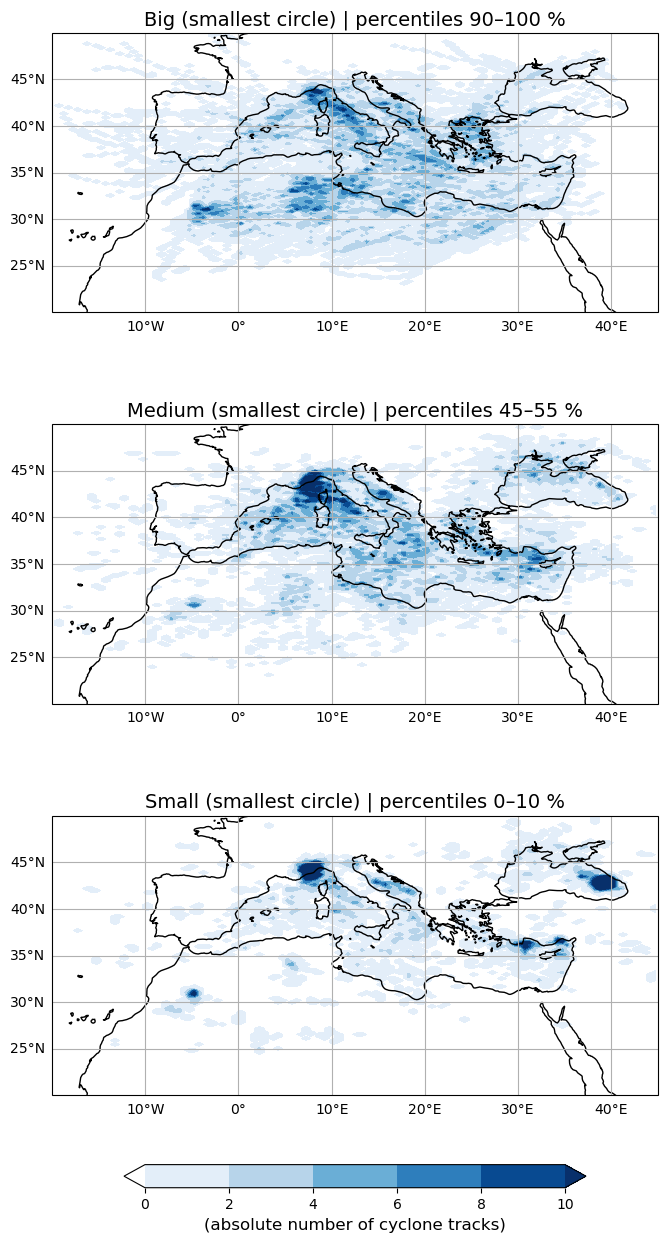

In [142]:
# ALL THREE
# Axes for binning
points_per_deg = 2
lon_bins = np.linspace(-20, 45, 65*points_per_deg+1)
lat_bins = np.linspace(20, 50, 70*points_per_deg+1)
bin_area = (lon_bins[1]-lon_bins[0])*(lat_bins[1]-lat_bins[0])
lon_bin_cents = (lon_bins[1::]+lon_bins[:-1:])/2
lat_bin_cents = (lat_bins[1::]+lat_bins[:-1:])/2

# Create a figure with 3 subplots arranged vertically
fig, axes = plt.subplots(3, 1, figsize=(8, 15), subplot_kw={'projection': ccrs.PlateCarree()})
fig.subplots_adjust(hspace=0.4)  # Adjust space between subplots

# Define colorbar parameters
fixed_vmin = 0
fixed_vmax = 10
norm = mcolors.Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
contour_levels = np.linspace(fixed_vmin, fixed_vmax, 6)  # 6 bins
cmap = mcolors.ListedColormap(['white'] + [plt.cm.Blues(i) for i in range(1, plt.cm.Blues.N)])

# Define the datasets and corresponding titles
datasets = [tracks_bigcircle_ref, tracks_midicircle_ref, tracks_smallcircle_ref]
titles = ['Big (smallest circle) | percentiles 90–100 %', 
          'Medium (smallest circle) | percentiles 45–55 %', 
          'Small (smallest circle) | percentiles 0–10 %']

# Loop through each subplot, plot the histogram data, and add the colorbar
for i, (ax, dataset) in enumerate(zip(axes, datasets)):
    # Computing 3D histogram for the dataset
    hist_datad = np.histogramdd((dataset.lon, dataset.lat, dataset.id), bins=[lon_bins, lat_bins, np.unique(dataset.id)])
    hist_data = np.transpose(np.sum((hist_datad[0] != 0), axis=2))

    # Plotting the contour plot for each subplot
    h2 = ax.contourf(
        lon_bin_cents, lat_bin_cents, hist_data, contour_levels,
        norm=norm, cmap=cmap, extend='both', transform=ccrs.PlateCarree(), zorder=0
    )

    ax.set_extent([-20, 45, 20, 50], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.set_title(titles[i], fontsize=14)
    g1 = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    g1.top_labels = False
    g1.right_labels = False

# Add colorbar for the contour levels at the bottom
cbar = fig.colorbar(h2, ax=axes, orientation='horizontal', fraction=0.02, pad=0.06, ticks=contour_levels)
cbar.set_label('(absolute number of cyclone tracks)', fontsize=12)

# Set figure size and save
fig.set_size_inches(8, 15)
fig.savefig(fig_dir+'track_density_circle.png', dpi=500)

# Histograms of Medi-Crossers (df_crossers)

## Full-track Stationarity

### Median Velocity

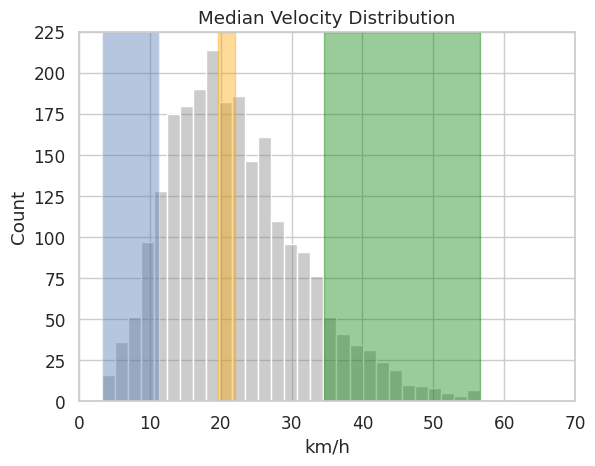

In [143]:
# Histogram
sns.set(style='whitegrid', font_scale=1.1)
sns.histplot(median_vel, alpha=0.4, color='gray')

#Indicate velocity categories
plt.axvspan(perc_90_medv, max(median_vel), alpha=0.4, color='green')     #fast
plt.axvspan(perc_45_medv, perc_55_medv, alpha=0.4, color='orange')            #middle
plt.axvspan(min(median_vel), perc_10_medv, alpha=0.4)                    #slow

# Adjust x-,y-axis limits
plt.xlim(0, 70)
plt.ylim(0, 225) 
# Or specify custom ticks:
# plt.xticks(range(0, 101, 10))  # Adjust based on your data range
# plt.yticks(range(0, 101, 10))  # Adjust based on your data range

# Labels and title
plt.xlabel('km/h')
plt.ylabel('Count')
plt.title('Median Velocity Distribution')

plt.savefig(fig_dir+'hist_medv.png', dpi=500)
plt.show()

#### Intensity

In [144]:
#Get min-pressure (=max Intensity) per id of each velocity category
list_fast_int_medi = []                                               #create a list of...
for c in np.unique(tracks_fast['id'].values):                    #for as many c as there are in range(..),
    id = tracks_fast.loc[tracks_fast['id'] == c]                 #store all the id's of tracks_fast in id
    fast_min_hPa_medi = np.min(id['hPa'])                             #calculate min pressure per id
    list_fast_int_medi.append(fast_min_hPa_medi)                           #add the minimas to the list
fast_int_medi = np.array(list_fast_int_medi)

list_middle_int_medi = []                                              
for c in np.unique(tracks_middle['id'].values):   
    id = tracks_middle.loc[tracks_middle['id'] == c]                  
    middle_min_hPa_medi = np.min(id['hPa'])
    list_middle_int_medi.append(middle_min_hPa_medi)                                
middle_int_medi = np.array(list_middle_int_medi)

list_slow_int_medi = []                                               
for c in np.unique(tracks_slow['id'].values):
    id = tracks_slow.loc[tracks_slow['id'] == c] 
    slow_min_hPa_medi = np.min(id['hPa'])
    list_slow_int_medi.append(slow_min_hPa_medi)                               
slow_int_medi = np.array(list_slow_int_medi)

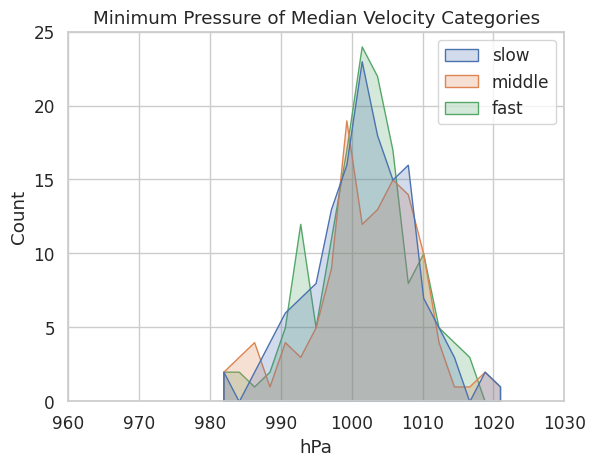

In [145]:
#Dataset
data = pd.DataFrame([slow_int_medi,middle_int_medi,fast_int_medi]).T
data.columns = ['slow','middle','fast']

#Hist
sns.set(style='whitegrid', font_scale=1.1)
sns.histplot(data, element='poly')

# Adjust x-,y-axis limits
plt.xlim(960, 1030)
plt.ylim(0, 25) 
# Or specify custom ticks:
# plt.xticks(range(0, 101, 10))  # Adjust based on your data range
# plt.yticks(range(0, 101, 10))  # Adjust based on your data range

# Labels and title
plt.xlabel('hPa')
plt.ylabel('Count')
plt.title('Minimum Pressure of Median Velocity Categories')

plt.savefig(fig_dir + 'hist_medv_int.png', dpi=500)
plt.show()

#### Duration/Lifetime

In [146]:
#Get total duration/lifetime per id of each velocity category
list_fast_dur = []                                               #create a list of...
for c in np.unique(tracks_fast['id'].values):                    #for as many c as there are in range(..),
    id = tracks_fast.loc[tracks_fast['id'] == c]                 #store all the id's in tracks_fast as id
    fast_min_dur = len(id)                                       #calculate total duration/lifetime per id
    list_fast_dur.append(fast_min_dur)                           #add the durations to the list
fast_dur = np.array(list_fast_dur)

list_middle_dur = []                                               #create a list of...
for c in np.unique(tracks_middle['id'].values):                    #for as many c as there are in range(..),
    id = tracks_middle.loc[tracks_middle['id'] == c]                 #store all the id's in tracks_middle in id
    middle_min_dur = len(id)                                       #calculate total duration/lifetime per id
    list_middle_dur.append(middle_min_dur)                           #add the durations to the list
middle_dur = np.array(list_middle_dur)

list_slow_dur = []                                               #create a list of...
for c in np.unique(tracks_slow['id'].values):                    #for as many c as there are in range(..),
    id = tracks_slow.loc[tracks_slow['id'] == c]                 #store all the id's in tracks_slow in id
    slow_min_dur = len(id)                                       #calculate total duration/lifetime per id
    list_slow_dur.append(slow_min_dur)                           #add the durations to the list
slow_dur = np.array(list_slow_dur)

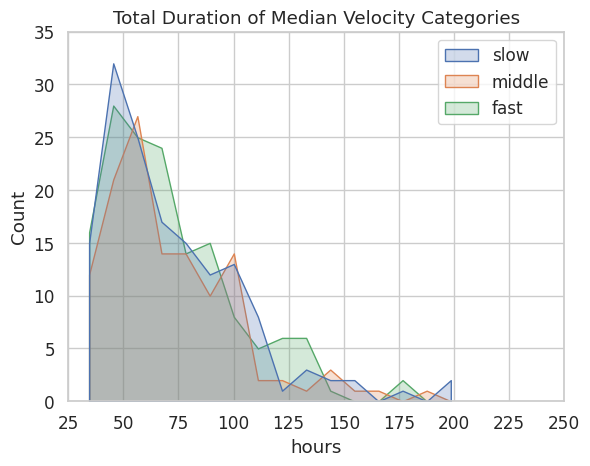

In [147]:
#Dataset
data = pd.DataFrame([slow_dur,middle_dur,fast_dur]).T
data.columns = ['slow','middle','fast']

#Hist
sns.set(style='whitegrid', font_scale=1.1)
sns.histplot(data, element='poly')

# Adjust y-axis limits
plt.xlim(25, 250)
plt.ylim(0, 35) 
# Or specify custom ticks:
# plt.yticks(range(0, 101, 10))  # Adjust based on your data range

# Labels and title
plt.xlabel('hours')
plt.ylabel('Count')
plt.title('Total Duration of Median Velocity Categories')

plt.savefig(fig_dir + 'hist_medv_dur.png', dpi=500)
plt.show()

### Total Distance (Path Stationarity)

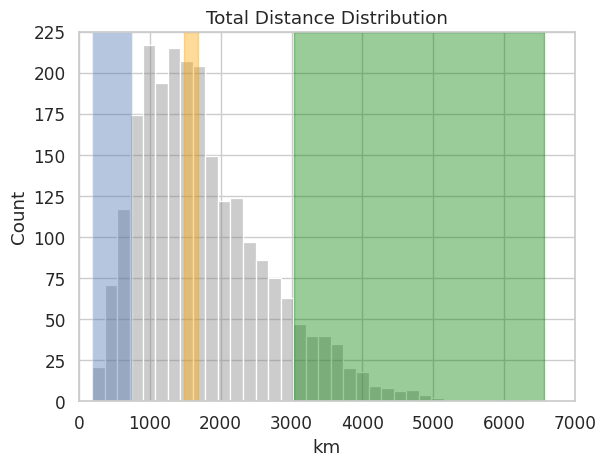

In [148]:
# Histogram
sns.set(style='whitegrid', font_scale=1.1)
sns.histplot(all_dist, alpha=0.4, color='gray')

#Indicate velocity categories
plt.axvspan(perc_90_d, max(all_dist), alpha=0.4, color='green')    #long
plt.axvspan(perc_45_d, perc_55_d, alpha=0.4, color='orange')            #mid
plt.axvspan(min(all_dist), perc_10_d, alpha=0.4)                    #short

# Adjust x-,y-axis limits
plt.xlim(0, 7000)
plt.ylim(0, 225) 
# Or specify custom ticks:
# plt.xticks(range(0, 101, 10))  # Adjust based on your data range
# plt.yticks(range(0, 101, 10))  # Adjust based on your data range

# Labels and title
plt.xlabel('km')
plt.ylabel('Count')
plt.title('Total Distance Distribution')

plt.savefig(fig_dir + 'hist_totdist.png', dpi=500)
plt.show()

#### Intensity

In [149]:
#Get min-pressure (=max Intensity) per id of each velocity category
list_long_int_medi = []                                               #create a list of...
for c in np.unique(tracks_long['id'].values):                    #for as many c as there are in range(..),
    id = tracks_long.loc[tracks_long['id'] == c]                 #store all the id's of tracks_long in id
    long_min_hPa_medi = np.min(id['hPa'])                             #calculate min pressure per id
    list_long_int_medi.append(long_min_hPa_medi)                           #add the minimas to the list
long_int_medi = np.array(list_long_int_medi)

list_mid_int_medi = []                                              
for c in np.unique(tracks_midi['id'].values):   
    id = tracks_midi.loc[tracks_midi['id'] == c]                  
    mid_min_hPa_medi = np.min(id['hPa'])
    list_mid_int_medi.append(mid_min_hPa_medi)                                
mid_int_medi = np.array(list_mid_int_medi)

list_short_int_medi = []                                               
for c in np.unique(tracks_short['id'].values):
    id = tracks_short.loc[tracks_short['id'] == c] 
    short_min_hPa_medi = np.min(id['hPa'])
    list_short_int_medi.append(short_min_hPa_medi)                               
short_int_medi = np.array(list_short_int_medi)

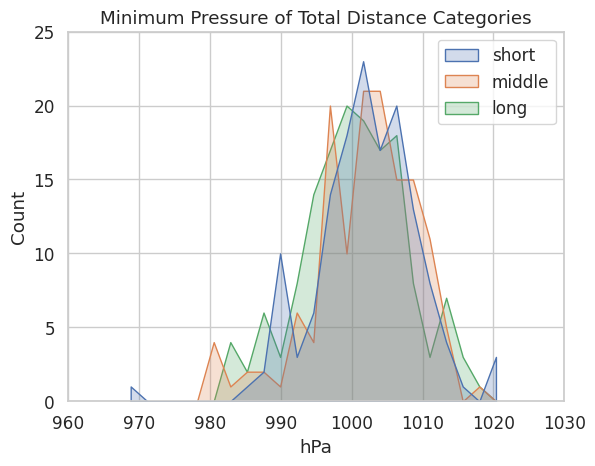

In [150]:
#Dataset
data = pd.DataFrame([short_int_medi,mid_int_medi,long_int_medi]).T
data.columns = ['short','middle','long']

#Hist
sns.set(style='whitegrid', font_scale=1.1)
sns.histplot(data, element='poly')

# Adjust y-axis limits
plt.xlim(960, 1030)
plt.ylim(0, 25)
# Or specify custom ticks:
# plt.yticks(range(0, 101, 10))  # Adjust based on your data range

# Labels and title
plt.xlabel('hPa')
plt.ylabel('Count')
plt.title('Minimum Pressure of Total Distance Categories')

plt.savefig(fig_dir + 'hist_totdist_int.png', dpi=500)
plt.show()

#### Duration/Lifetime

In [151]:
#Get total duration/lifetime per id of each velocity category
list_long_dur = []                                               #create a list of...
for c in np.unique(tracks_long['id'].values):                    #for as many c as there are in range(..),
    id = tracks_long.loc[tracks_long['id'] == c]                 #store all the id's in tracks_long in id
    long_min_dur = len(id)                                       #calculate total duration/lifetime per id
    list_long_dur.append(long_min_dur)                           #add the durations to the list
long_dur = np.array(list_long_dur)

list_mid_dur = []                                               #create a list of...
for c in np.unique(tracks_midi['id'].values):                    #for as many c as there are in range(..),
    id = tracks_midi.loc[tracks_midi['id'] == c]                 #store all the id's in tracks_midi in id
    mid_min_dur = len(id)                                       #calculate total duration/lifetime per id
    list_mid_dur.append(mid_min_dur)                           #add the durations to the list
mid_dur = np.array(list_mid_dur)

list_short_dur = []                                               #create a list of...
for c in np.unique(tracks_short['id'].values):                    #for as many c as there are in range(..),
    id = tracks_short.loc[tracks_short['id'] == c]                 #store all the id's in tracks_short in id
    short_min_dur = len(id)                                       #calculate total duration/lifetime per id
    list_short_dur.append(short_min_dur)                           #add the durations to the list
short_dur = np.array(list_short_dur)

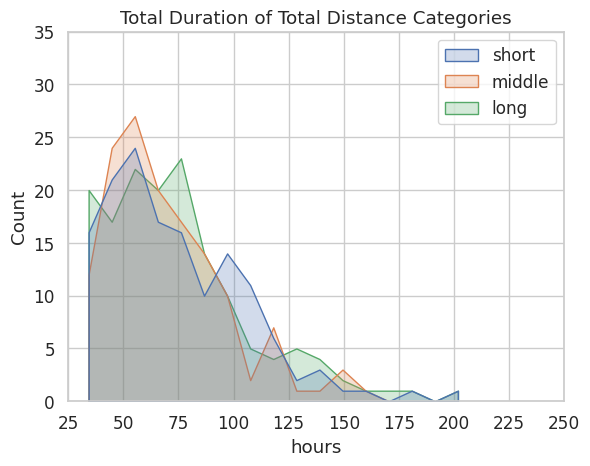

In [152]:
#Dataset
data = pd.DataFrame([short_dur,mid_dur,long_dur]).T
data.columns = ['short','middle','long']

#Hist
sns.set(style='whitegrid', font_scale=1.1)
sns.histplot(data, element='poly')

# Adjust y-axis limits
plt.xlim(25, 250)
plt.ylim(0, 35) 
# Or specify custom ticks:
# plt.yticks(range(0, 101, 10))  # Adjust based on your data range

# Labels and title
plt.xlabel('hours')
plt.ylabel('Count')
plt.title('Total Duration of Total Distance Categories')

plt.savefig(fig_dir + 'hist_totdist_dur.png', dpi=500)
plt.show()

### (Total Duration)

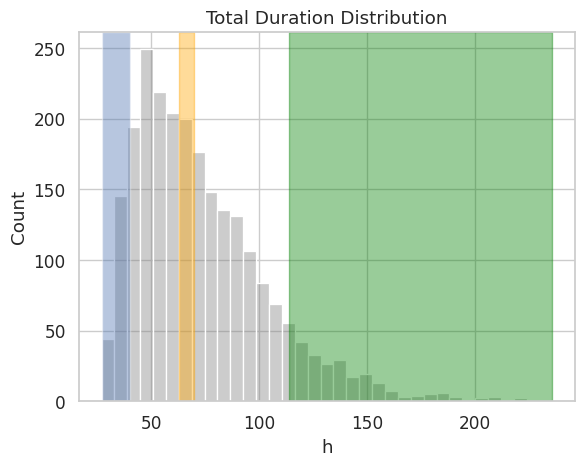

In [153]:
#Create hist of Total Duration/Lifetime Distribution
# Histogram
sns.set(style='whitegrid', font_scale=1.1)
sns.histplot(all_dur, alpha=0.4, color='gray')

#Indicate velocity categories
plt.axvspan(perc_90_dur, max(all_dur), alpha=0.4, color='green')     #fast
plt.axvspan(perc_45_dur, perc_55_dur, alpha=0.4, color='orange')            #middle
plt.axvspan(min(all_dur), perc_10_dur, alpha=0.4)                    #slow

# Labels and title
plt.xlabel('h')
plt.ylabel('Count')
plt.title('Total Duration Distribution')

plt.savefig(fig_dir+'hist_dur.png', dpi=500)
plt.show()

#### Intensity

In [154]:
#Get min-pressure (=max Intensity) per id of each age category
list_longdur_int_medi = []                                               #create a list of...
for c in np.unique(tracks_longdur['id'].values):                    #for as many c as there are in range(..),
    id = tracks_longdur.loc[tracks_longdur['id'] == c]                 #store all the id's of tracks_longdur in id
    longdur_min_hPa_medi = np.min(id['hPa'])                             #calculate min pressure per id
    list_longdur_int_medi.append(longdur_min_hPa_medi)                           #add the minimas to the list
longdur_int_medi = np.array(list_longdur_int_medi)

list_midur_int_medi = []                                              
for c in np.unique(tracks_midur['id'].values):   
    id = tracks_midur.loc[tracks_midur['id'] == c]                  
    midur_min_hPa_medi = np.min(id['hPa'])
    list_midur_int_medi.append(midur_min_hPa_medi)                                
midur_int_medi = np.array(list_midur_int_medi)

list_shortdur_int_medi = []                                               
for c in np.unique(tracks_shortdur['id'].values):
    id = tracks_shortdur.loc[tracks_shortdur['id'] == c] 
    shortdur_min_hPa_medi = np.min(id['hPa'])
    list_shortdur_int_medi.append(shortdur_min_hPa_medi)                               
shortdur_int_medi = np.array(list_shortdur_int_medi)

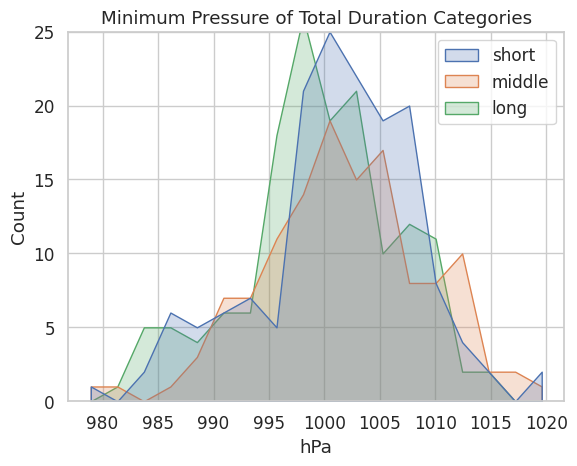

In [155]:
#Dataset
data = pd.DataFrame([shortdur_int_medi,midur_int_medi,longdur_int_medi]).T
data.columns = ['short','middle','long']

#Hist
sns.set(style='whitegrid', font_scale=1.1)
sns.histplot(data, element='poly')

# Adjust y-axis limits
plt.ylim(0, 25) 
# Or specify custom ticks:
# plt.yticks(range(0, 101, 10))  # Adjust based on your data range

# Labels and title
plt.xlabel('hPa')
plt.ylabel('Count')
plt.title('Minimum Pressure of Total Duration Categories')

plt.savefig(fig_dir + 'hist_dur_int.png', dpi=500)
plt.show()

## Along Track Stationarity

### 12-hour Distance

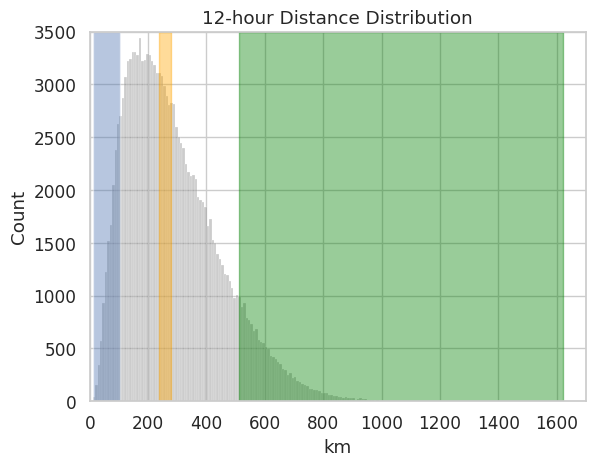

In [156]:
# Histogram
sns.set(style='whitegrid', font_scale=1.1)
sns.histplot(all_dist_12hrs, alpha=0.4, color='gray')

#Indicate velocity categories
plt.axvspan(perc_90_12, max(all_dist_12hrs), alpha=0.4, color='green')     #long
plt.axvspan(perc_45_12, perc_55_12, alpha=0.4, color='orange')            #midi
plt.axvspan(min(all_dist_12hrs), perc_10_12, alpha=0.4)                    #short

# Adjust x-,y-axis limits
plt.xlim(0, 1700)
plt.ylim(0, 3500) 
# Or specify custom ticks:
# plt.xticks(range(0, 101, 10))  # Adjust based on your data range
# plt.yticks(range(0, 101, 10))  # Adjust based on your data range

# Labels and title
plt.xlabel('km')
plt.ylabel('Count')
plt.title('12-hour Distance Distribution')

plt.savefig(fig_dir+'hist_12.png', dpi=500)
plt.show()

#### Intensity

In [157]:
#Get min-pressure (=max Intensity) per id of each velocity category
list_long_int_12 = []                                               #create a list of...
for c in np.unique(tracks_long12_ref['id'].values):                    #for as many c as there are in range(..),
    id = tracks_long12_ref.loc[tracks_long12_ref['id'] == c]                 #store all the id's of tracks_long12_ref in id
    long_min_hPa_12 = np.min(id['hPa'])                             #calculate min pressure per id
    list_long_int_12.append(long_min_hPa_12)                           #add the minimas to the list
long_int_12 = np.array(list_long_int_12)

list_mid_int_12 = []                                              
for c in np.unique(tracks_midi12_ref['id'].values):   
    id = tracks_midi12_ref.loc[tracks_midi12_ref['id'] == c]                  
    mid_min_hPa_12 = np.min(id['hPa'])
    list_mid_int_12.append(mid_min_hPa_12)                                
mid_int_12 = np.array(list_mid_int_12)

list_short_int_12 = []                                               
for c in np.unique(tracks_short12_ref['id'].values):
    id = tracks_short12_ref.loc[tracks_short12_ref['id'] == c] 
    short_min_hPa_12 = np.min(id['hPa'])
    list_short_int_12.append(short_min_hPa_12)                               
short_int_12 = np.array(list_short_int_12)

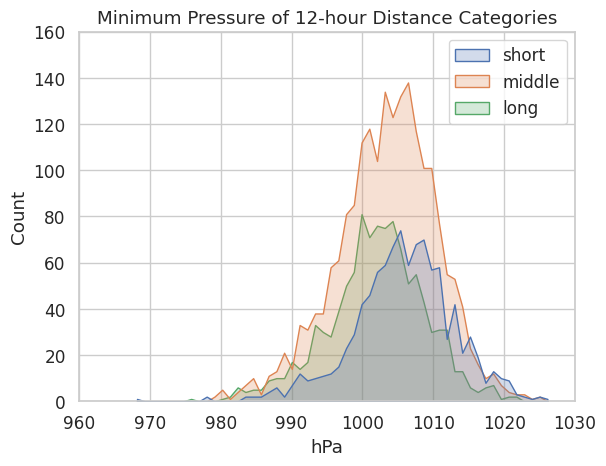

In [158]:
#Dataset
data = pd.DataFrame([short_int_12,mid_int_12,long_int_12]).T
data.columns = ['short','middle','long']

#Hist
sns.set(style='whitegrid', font_scale=1.1)
sns.histplot(data, element='poly')

# Adjust y-axis limits
plt.xlim(960, 1030)
plt.ylim(0, 160) 
# Or specify custom ticks:
# plt.yticks(range(0, 101, 10))  # Adjust based on your data range

# Labels and title
plt.xlabel('hPa')
plt.ylabel('Count')
plt.title('Minimum Pressure of 12-hour Distance Categories')

plt.savefig(fig_dir + 'hist_12_int.png', dpi=500)
plt.show()

#### Duration/Lifetime

In [159]:
#Get total duration/lifetime per id of each velocity category
list_long_dur_12 = []                                               #create a list of...
for a in np.unique(tracks_long12_ref['id'].values):                    #for as many c as there are in range(..),
    long_min_dur_12 = len(df_crossers[df_crossers['id'] == a])         #calculate total duration/lifetime per id
    list_long_dur_12.append(long_min_dur_12)                           #add the durations to the list
long_dur_12 = np.array(list_long_dur_12)

list_mid_dur_12 = []                                               #create a list of...
for b in np.unique(tracks_midi12_ref['id'].values):                    #for as many c as there are in range(..),
    mid_min_dur_12 = len(df_crossers[df_crossers['id'] == b])                                       #calculate total duration/lifetime per id
    list_mid_dur_12.append(mid_min_dur_12)                           #add the durations to the list
mid_dur_12 = np.array(list_mid_dur_12)

list_short_dur_12 = []                                               #create a list of...
for c in np.unique(tracks_short12_ref['id'].values):                    #for as many c as there are in range(..),
    short_min_dur_12 = len(df_crossers[df_crossers['id'] == c])                                       #calculate total duration/lifetime per id
    list_short_dur_12.append(short_min_dur_12)                           #add the durations to the list
short_dur_12 = np.array(list_short_dur_12)

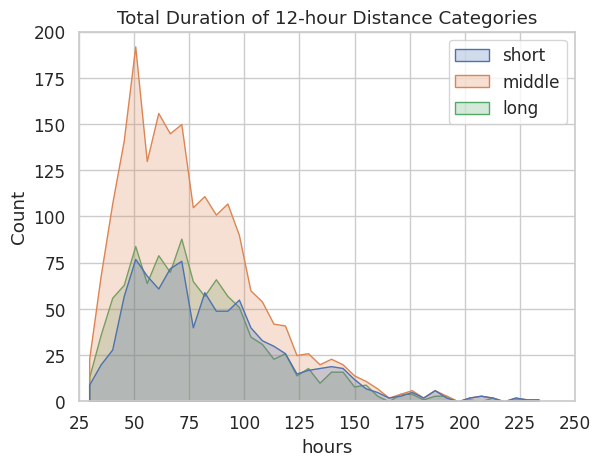

In [160]:
#Dataset
data = pd.DataFrame([short_dur_12,mid_dur_12,long_dur_12]).T
data.columns = ['short','middle','long']

#Hist
sns.set(style='whitegrid', font_scale=1.1)
sns.histplot(data, element='poly')

# Adjust y-axis limits
plt.xlim(25, 250)
plt.ylim(0, 200) 
# Or specify custom ticks:
# plt.yticks(range(0, 101, 10))  # Adjust based on your data range

# Labels and title
plt.xlabel('hours')
plt.ylabel('Count')
plt.title('Total Duration of 12-hour Distance Categories')

plt.savefig(fig_dir + 'hist_12_dur.png', dpi=500)
plt.show()

### Radial Distance

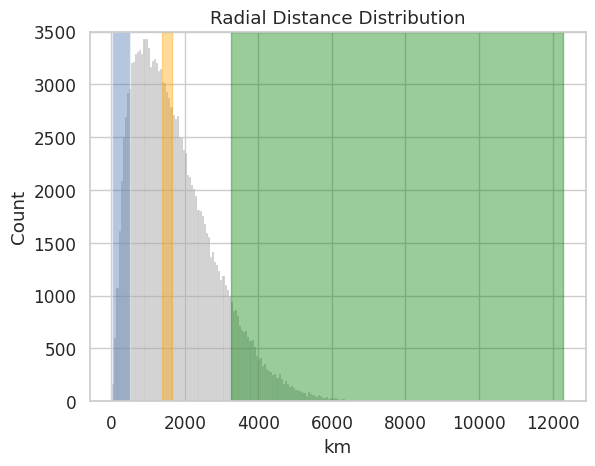

In [161]:
# Histogram
sns.set(style='whitegrid', font_scale=1.1)
sns.histplot(all_dist_rad, alpha=0.4, color='gray')

#Indicate velocity categories
plt.axvspan(perc_90_rad, max(all_dist_rad), alpha=0.4, color='green')     #long
plt.axvspan(perc_45_rad, perc_55_rad, alpha=0.4, color='orange')            #midi
plt.axvspan(min(all_dist_rad), perc_10_rad, alpha=0.4)                    #short

# Adjust x-,y-axis limits
#plt.xlim(0, 1200)
plt.ylim(0, 3500) 
# Or specify custom ticks:
# plt.xticks(range(0, 101, 10))  # Adjust based on your data range
# plt.yticks(range(0, 101, 10))  # Adjust based on your data range

# Labels and title
plt.xlabel('km')
plt.ylabel('Count')
plt.title('Radial Distance Distribution')

plt.savefig(fig_dir+'hist_rad.png', dpi=500)
plt.show()

#### Intensity

In [162]:
#Get min-pressure (=max Intensity) per id of each velocity category
list_long_int_rad = []                                               #create a list of...
for c in np.unique(tracks_longrad_ref['id'].values):                    #for as many c as there are in range(..),
    id = tracks_longrad_ref.loc[tracks_longrad_ref['id'] == c]                 #store all the id's of tracks_longrad_ref in id
    long_min_hPa_rad = np.min(id['hPa'])                             #calculate min pressure per id
    list_long_int_rad.append(long_min_hPa_rad)                           #add the minimas to the list
long_int_rad = np.array(list_long_int_rad)

list_mid_int_rad = []                                              
for c in np.unique(tracks_midirad_ref['id'].values):   
    id = tracks_midirad_ref.loc[tracks_midirad_ref['id'] == c]                  
    mid_min_hPa_rad = np.min(id['hPa'])
    list_mid_int_rad.append(mid_min_hPa_rad)                                
mid_int_rad = np.array(list_mid_int_rad)

list_short_int_rad = []                                               
for c in np.unique(tracks_shortrad_ref['id'].values):
    id = tracks_shortrad_ref.loc[tracks_shortrad_ref['id'] == c] 
    short_min_hPa_rad = np.min(id['hPa'])
    list_short_int_rad.append(short_min_hPa_rad)                               
short_int_rad = np.array(list_short_int_rad)

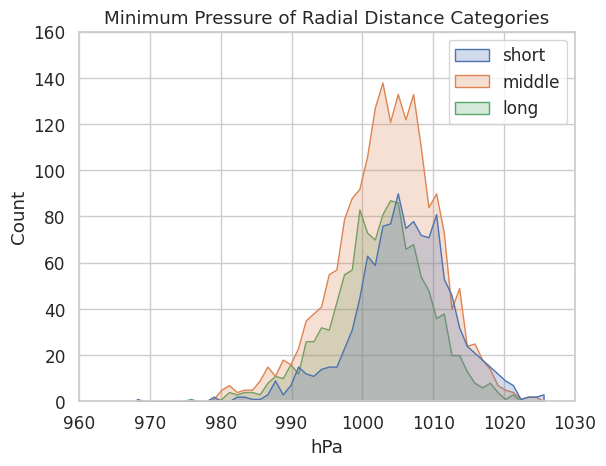

In [163]:
#Dataset
data = pd.DataFrame([short_int_rad,mid_int_rad,long_int_rad]).T
data.columns = ['short','middle','long']

#Hist
sns.set(style='whitegrid', font_scale=1.1)
sns.histplot(data, element='poly')

# Adjust y-axis limits
plt.xlim(960, 1030)
plt.ylim(0, 160) 
# Or specify custom ticks:
# plt.yticks(range(0, 101, 10))  # Adjust based on your data range

# Labels and title
plt.xlabel('hPa')
plt.ylabel('Count')
plt.title('Minimum Pressure of Radial Distance Categories')

plt.savefig(fig_dir + 'hist_rad_int.png', dpi=500)
plt.show()

#### Duration/Lifetime

In [164]:
#Get total duration/lifetime per id of each velocity category
list_long_dur_rad = []                                               #create a list of...
for a in np.unique(tracks_longrad_ref['id'].values):                    #for as many c as there are in range(..),
    long_min_dur_rad = len(df_crossers[df_crossers['id'] == a])         #calculate total duration/lifetime per id
    list_long_dur_rad.append(long_min_dur_rad)                           #add the durations to the list
long_dur_rad = np.array(list_long_dur_rad)

list_mid_dur_rad = []                                               #create a list of...
for b in np.unique(tracks_midirad_ref['id'].values):                    #for as many c as there are in range(..),
    mid_min_dur_rad = len(df_crossers[df_crossers['id'] == b])                                       #calculate total duration/lifetime per id
    list_mid_dur_rad.append(mid_min_dur_rad)                           #add the durations to the list
mid_dur_rad = np.array(list_mid_dur_rad)

list_short_dur_rad = []                                               #create a list of...
for c in np.unique(tracks_shortrad_ref['id'].values):                    #for as many c as there are in range(..),
    short_min_dur_rad = len(df_crossers[df_crossers['id'] == c])                                       #calculate total duration/lifetime per id
    list_short_dur_rad.append(short_min_dur_rad)                           #add the durations to the list
short_dur_rad = np.array(list_short_dur_rad)

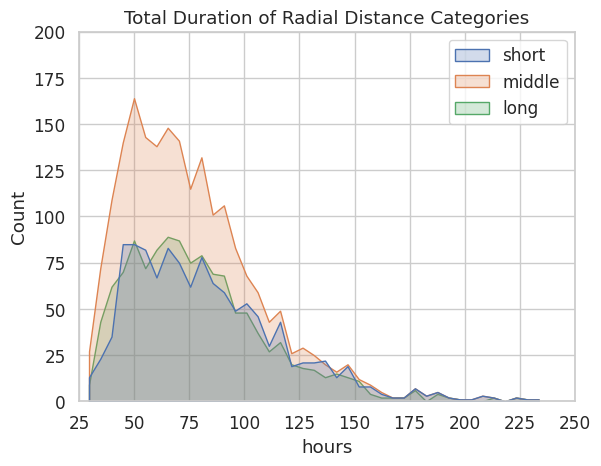

In [165]:
#Dataset
data = pd.DataFrame([short_dur_rad,mid_dur_rad,long_dur_rad]).T
data.columns = ['short','middle','long']

#Hist
sns.set(style='whitegrid', font_scale=1.1)
sns.histplot(data, element='poly')

# Adjust y-axis limits
plt.xlim(25, 250)
plt.ylim(0, 200) 
# Or specify custom ticks:
# plt.yticks(range(0, 101, 10))  # Adjust based on your data range

# Labels and title
plt.xlabel('hours')
plt.ylabel('Count')
plt.title('Total Duration of Radial Distance Categories')

plt.savefig(fig_dir + 'hist_rad_dur.png', dpi=500)
plt.show()

### Smallest Circle

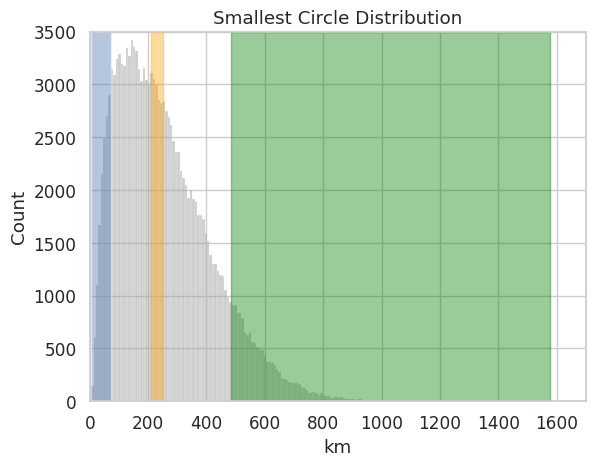

In [166]:
# Histogram
sns.set(style='whitegrid', font_scale=1.1)
sns.histplot(all_dist_circle, alpha=0.4, color='gray')

#Indicate velocity categories
plt.axvspan(perc_90_circle, max(all_dist_circle), alpha=0.4, color='green')     #long
plt.axvspan(perc_45_circle, perc_55_circle, alpha=0.4, color='orange')            #midi
plt.axvspan(min(all_dist_circle), perc_10_circle, alpha=0.4)                    #short

# Adjust x-,y-axis limits
plt.xlim(0, 1700)
plt.ylim(0, 3500) 
# Or specify custom ticks:
# plt.xticks(range(0, 101, 10))  # Adjust based on your data range
# plt.yticks(range(0, 101, 10))  # Adjust based on your data range

# Labels and title
plt.xlabel('km')
plt.ylabel('Count')
plt.title('Smallest Circle Distribution')

plt.savefig(fig_dir+'hist_circle.png', dpi=500)
plt.show()

#### Intensity

In [167]:
#Get min-pressure (=max Intensity) per id of each velocity category
list_big_int = []                                               #create a list of...
for c in np.unique(tracks_bigcircle_ref['id'].values):                    #for as many c as there are in range(..),
    id = tracks_bigcircle_ref.loc[tracks_bigcircle_ref['id'] == c]                 #store all the id's of tracks_bigcircle_ref in id
    big_min_hPa = np.min(id['hPa'])                             #calculate min pressure per id
    list_big_int.append(big_min_hPa)                           #add the minimas to the list
big_int = np.array(list_big_int)

list_midic_int = []                                              
for c in np.unique(tracks_midicircle_ref['id'].values):   
    id = tracks_midicircle_ref.loc[tracks_midicircle_ref['id'] == c]                  
    midic_min_hPa = np.min(id['hPa'])
    list_midic_int.append(midic_min_hPa)                                
midic_int = np.array(list_midic_int)

list_small_int = []                                               
for c in np.unique(tracks_smallcircle_ref['id'].values):
    id = tracks_smallcircle_ref.loc[tracks_smallcircle_ref['id'] == c] 
    small_min_hPa = np.min(id['hPa'])
    list_small_int.append(small_min_hPa)                               
small_int = np.array(list_small_int)

In [168]:
np.median(long_int_rad), np.median(mid_int_rad), np.median(short_int_rad)

(1002.79, 1003.745, 1005.79)

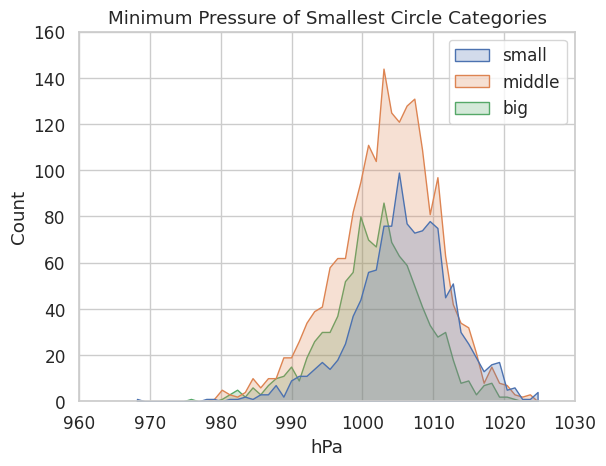

In [169]:
#Dataset
data = pd.DataFrame([small_int,midic_int,big_int]).T
data.columns = ['small','middle','big']

#Hist
sns.set(style='whitegrid', font_scale=1.1)
sns.histplot(data, element='poly')

# Adjust y-axis limits
plt.xlim(960, 1030)
plt.ylim(0, 160) 
# Or specify custom ticks:
# plt.yticks(range(0, 101, 10))  # Adjust based on your data range

# Labels and title
plt.xlabel('hPa')
plt.ylabel('Count')
plt.title('Minimum Pressure of Smallest Circle Categories')

plt.savefig(fig_dir + 'hist_circle_int.png', dpi=500)
plt.show()

#### Duration/Lifetime

In [170]:
#Get total duration/lifetime per id of each velocity category
list_big_dur = []                                               #create a list of...
for a in np.unique(tracks_bigcircle_ref['id'].values):                    #for as many c as there are in range(..),
    big_min_dur = len(df_crossers[df_crossers['id'] == a])         #calculate total duration/lifetime per id
    list_big_dur.append(big_min_dur)                           #add the durations to the list
big_dur = np.array(list_big_dur)

list_midic_dur = []                                               #create a list of...
for b in np.unique(tracks_midicircle_ref['id'].values):                    #for as many c as there are in range(..),
    midic_min_dur = len(df_crossers[df_crossers['id'] == b])                                       #calculate total duration/lifetime per id
    list_midic_dur.append(midic_min_dur)                           #add the durations to the list
midic_dur = np.array(list_midic_dur)

list_small_dur = []                                               #create a list of...
for c in np.unique(tracks_smallcircle_ref['id'].values):                    #for as many c as there are in range(..),
    small_min_dur = len(df_crossers[df_crossers['id'] == c])                                       #calculate total duration/lifetime per id
    list_small_dur.append(small_min_dur)                           #add the durations to the list
small_dur = np.array(list_small_dur)

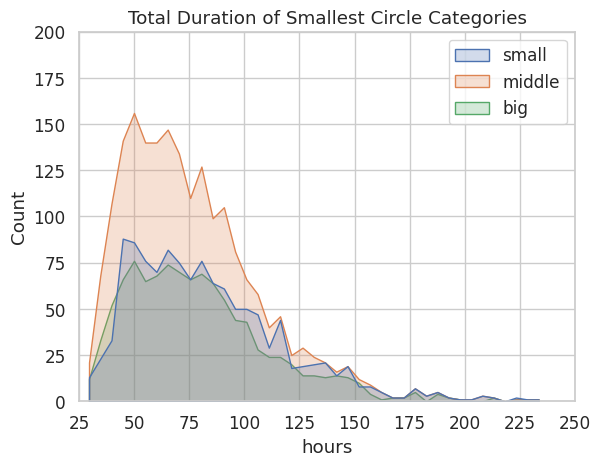

In [171]:
#Dataset
data = pd.DataFrame([small_dur,midic_dur,big_dur]).T
data.columns = ['small','middle','big']

#Hist
sns.set(style='whitegrid', font_scale=1.1)
sns.histplot(data, element='poly')

# Adjust y-axis limits
plt.xlim(25, 250)
plt.ylim(0, 200) 
# Or specify custom ticks:
# plt.yticks(range(0, 101, 10))  # Adjust based on your data range

# Labels and title
plt.xlabel('hours')
plt.ylabel('Count')
plt.title('Total Duration of Smallest Circle Categories')

plt.savefig(fig_dir + 'hist_circle_dur.png', dpi=500)
plt.show()

In [172]:
#Intensity
# FT
np.median(list_slow_int_medi), np.median(list_middle_int_medi), np.median(list_fast_int_medi), np.median(list_short_int_medi),np.median(list_mid_int_medi), np.median(list_long_int_medi)

# AT
#np.median(list_short_int_12),np.median(list_mid_int_12), np.median(list_long_int_12), np.median(list_short_int_rad),np.median(list_mid_int_rad), np.median(list_short_int_rad), np.median(list_small_int),np.median(list_midic_int), np.median(list_big_int)


(1001.75, 1002.36, 1001.97, 1002.48, 1002.61, 1000.63)

In [173]:
#Duration
# FT
np.median(list_slow_dur), np.median(list_middle_dur), np.median(list_fast_dur), np.median(list_short_dur),np.median(list_mid_dur), np.median(list_long_dur)

#AT
#np.median(list_short_dur_12),np.median(list_mid_dur_12), np.median(list_long_dur_12), np.median(list_short_dur_rad),np.median(list_mid_dur_rad), np.median(list_short_dur_rad), np.median(list_small_dur),np.median(list_midic_dur), np.median(list_big_dur)

(64.0, 63.0, 63.0, 67.0, 63.0, 68.0)

## Median Velocity vs Total Distance

In [174]:
#Create dataframe with all median velocities and total distances per cyclone
medpath = pd.DataFrame([median_vel,all_dist]).T
medpath.columns = ['median_vel','all_dist']
medpath

median_vel     all_dist
0      31.008022  1355.115214
1      31.154744  1383.069353
2      27.322200  3484.398718
3      40.211951  1859.104729
4      24.748190  1041.899127
...          ...          ...
2372   26.546358  1235.577436
2373   36.021598  1081.493767
2374   20.293505  1088.313898
2375   33.954863  1708.164576
2376   10.430317  1068.240564

[2377 rows x 2 columns]

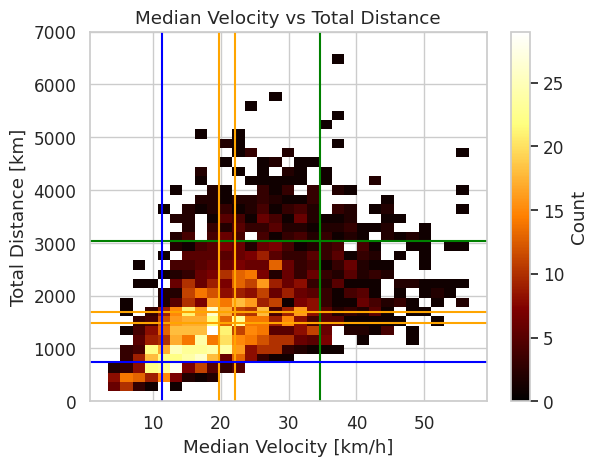

In [175]:
#Hist
sns.set(style='whitegrid', font_scale=1.1)
sns.histplot(medpath,x=medpath.median_vel, y=medpath.all_dist, cmap="afmhot", cbar=True, cbar_kws={'label': 'Count'})

# Labels and title
plt.xlabel('Median Velocity [km/h]')
plt.ylabel('Total Distance [km]')
plt.title('Median Velocity vs Total Distance')

# Axis limits
#plt.xlim(0, 60)
plt.ylim(0, 7000)

#Percentiles
plt.axvline(perc_90_medv, color='green')
plt.axhline(perc_90_d, color='green')
plt.axvline(perc_55_medv, color='orange')
plt.axhline(perc_55_d, color='orange')
plt.axvline(perc_45_medv, color='orange')
plt.axhline(perc_45_d, color='orange')
plt.axvline(perc_10_medv, color='blue')
plt.axhline(perc_10_d, color='blue')

plt.savefig(fig_dir + 'graph_medv_totdist.png', dpi=500)
plt.show()

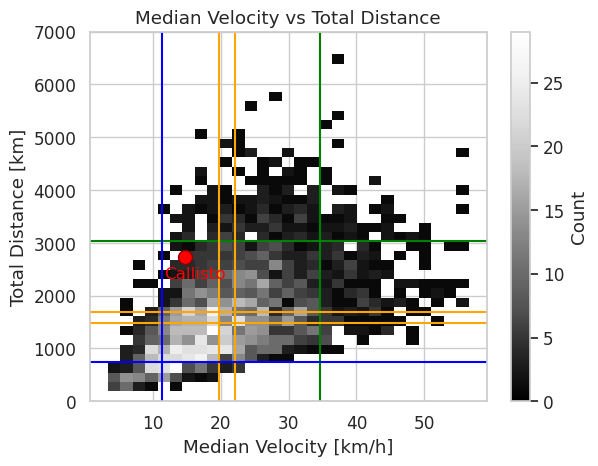

In [177]:
#Hist
sns.set(style='whitegrid', font_scale=1.1)
sns.histplot(medpath,x=medpath.median_vel, y=medpath.all_dist, cmap="Greys_r", cbar=True, cbar_kws={'label': 'Count'})

# Labels and title
plt.xlabel('Median Velocity [km/h]')
plt.ylabel('Total Distance [km]')
plt.title('Median Velocity vs Total Distance')

# Axis limits
#plt.xlim(0, 7000)
plt.ylim(0, 7000)

# Highlight the specific point
highlight_x = np.unique(df_QS[df_QS['id'] == 409]['FT_MED_VEL_v'])
highlight_y = np.unique(df_QS[df_QS['id'] == 409]['FT_TOT_DIST_v'])
#highlight_x = 14.65745374
#highlight_y = 2725.92681738
plt.scatter(highlight_x, highlight_y, color='red', s=100, label="Highlighted Point", edgecolors='darkred')

# Optional: add a label to the point
plt.text(highlight_x -3, highlight_y - 400, f'Callisto', color='Red', fontsize=12)

#Percentiles
plt.axvline(perc_90_medv, color='green')
plt.axhline(perc_90_d, color='green')
plt.axvline(perc_55_medv, color='orange')
plt.axhline(perc_55_d, color='orange')
plt.axvline(perc_45_medv, color='orange')
plt.axhline(perc_45_d, color='orange')
plt.axvline(perc_10_medv, color='blue')
plt.axhline(perc_10_d, color='blue')

plt.savefig(fig_dir + 'graph_medv_totdist_409.png', dpi=500)
plt.show()

## Median vs Duration

In [178]:
#Create dataframe with all median velocities and total distances per cyclone
medur = pd.DataFrame([median_vel,all_dur]).T
medur.columns = ['median_vel','all_dur']
medur

median_vel  all_dur
0      31.008022     48.0
1      31.154744     43.0
2      27.322200    127.0
3      40.211951     42.0
4      24.748190     42.0
...          ...      ...
2372   26.546358     42.0
2373   36.021598     33.0
2374   20.293505     47.0
2375   33.954863     48.0
2376   10.430317     98.0

[2377 rows x 2 columns]

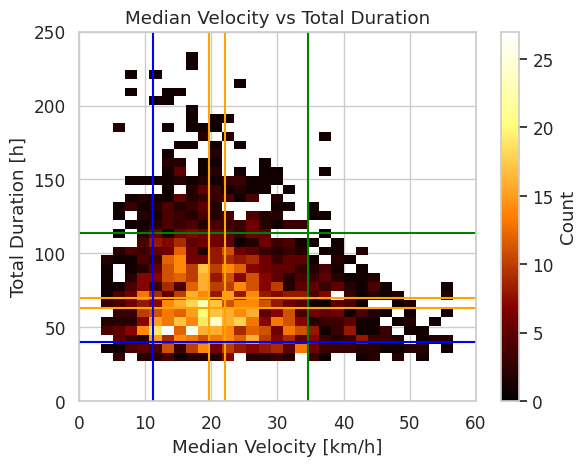

In [179]:
#Hist
sns.set(style='whitegrid', font_scale=1.1)
sns.histplot(medur,x=medur.median_vel, y=medur.all_dur, cmap="afmhot", cbar=True, cbar_kws={'label': 'Count'})

# Labels and title
plt.xlabel('Median Velocity [km/h]')
plt.ylabel('Total Duration [h]')
plt.title('Median Velocity vs Total Duration')

# Axis limits
plt.xlim(0, 60)
plt.ylim(0, 250)

#Percentiles
plt.axvline(perc_90_medv, color='green')
plt.axhline(perc_90_dur, color='green')
plt.axvline(perc_55_medv, color='orange')
plt.axhline(perc_55_dur, color='orange')
plt.axvline(perc_45_medv, color='orange')
plt.axhline(perc_45_dur, color='orange')
plt.axvline(perc_10_medv, color='blue')
plt.axhline(perc_10_dur, color='blue')

plt.savefig(fig_dir + 'graph_medv_dur.png', dpi=500)
plt.show()

## 12-hour Distance vs Radial Distance

In [180]:
#Create dataframe with median velocities of 12-hour Distance categories
rad12 = pd.DataFrame([all_dist_12hrs, all_dist_rad]).T
rad12.columns = ['all_dist_12hrs', 'all_dist_rad']
rad12

all_dist_12hrs  all_dist_rad
0           293.161859   1554.441246
1           313.308101   1710.421483
2           321.902840   1779.948644
3           319.393275   1752.834779
4           313.969537   1687.237099
...                ...           ...
145261      122.902048    461.180215
145262      131.195702    494.613999
145263      137.406060    513.610282
145264      139.920416    472.738891
145265      137.692926    363.786099

[145266 rows x 2 columns]

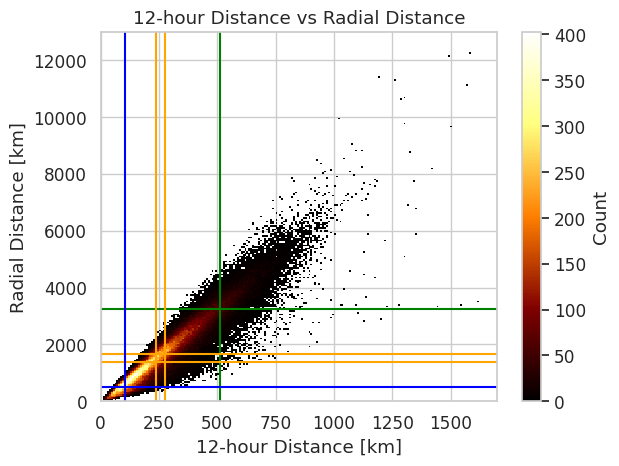

In [181]:
#Hist
sns.set(style='whitegrid', font_scale=1.1)
sns.histplot(rad12,x=rad12.all_dist_12hrs, y=rad12.all_dist_rad, cmap="afmhot", cbar=True, cbar_kws={'label': 'Count'}) #afmhot

# Labels and title
plt.xlabel('12-hour Distance [km]')
plt.ylabel('Radial Distance [km]')
plt.title('12-hour Distance vs Radial Distance')

# Axis limits
plt.xlim(0, 1700)
plt.ylim(0, 13000)

#Percentiles
plt.axvline(perc_90_12, color='green')
plt.axhline(perc_90_rad, color='green')
plt.axvline(perc_55_12, color='orange')
plt.axhline(perc_55_rad, color='orange')
plt.axvline(perc_45_12, color='orange')
plt.axhline(perc_45_rad, color='orange')
plt.axvline(perc_10_12, color='blue')
plt.axhline(perc_10_rad, color='blue')

plt.savefig(fig_dir + 'graph_12_rad.png', dpi=500)
plt.show()

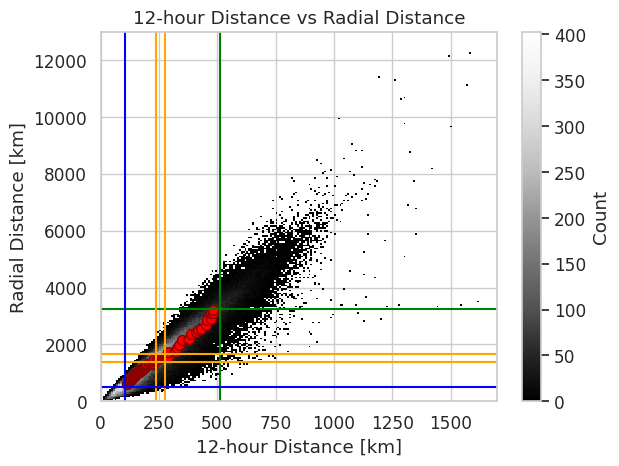

In [182]:
# Assuming df_QS and rad12 are correctly loaded and available
sns.set(style='whitegrid', font_scale=1.1)

# Create a 2D histogram using sns.histplot
sns.histplot(data=rad12, x='all_dist_12hrs', y='all_dist_rad', 
             cmap='Greys_r', cbar=True, cbar_kws={'label': 'Count'}) 

# Labels and title
plt.xlabel('12-hour Distance [km]')
plt.ylabel('Radial Distance [km]')
plt.title('12-hour Distance vs Radial Distance')

# Axis limits
plt.xlim(0, 1700)
plt.ylim(0, 13000)

# Get x and y values for id 409 (or another id)
x = np.unique(df_QS[df_QS['id'] == 409]['AT_12h_DIST_v'])
y = np.unique(df_QS[df_QS['id'] == 409]['AT_RAD_DIST_v'])

# Ensure x and y have the same length
assert len(x) == len(y), "Arrays x and y must have the same length"

# Iterate over the x and y values to highlight each point
for i, (xi, yi) in enumerate(zip(x, y)):
    plt.scatter(xi, yi, color='red', s=50, edgecolors='darkred')
    
# Percentiles (assuming they are defined somewhere)
plt.axvline(perc_90_12, color='green')
plt.axhline(perc_90_rad, color='green')
plt.axvline(perc_55_12, color='orange')
plt.axhline(perc_55_rad, color='orange')
plt.axvline(perc_45_12, color='orange')
plt.axhline(perc_45_rad, color='orange')
plt.axvline(perc_10_12, color='blue')
plt.axhline(perc_10_rad, color='blue')

plt.savefig(fig_dir + 'graph_12_rad_409.png', dpi=500)

# Show the plot
plt.show()

## 12-hour Distance vs Smallest Circle

In [183]:
#Create dataframe with median velocities of 12hrs-distance categories
circle12 = pd.DataFrame([all_dist_12hrs, all_dist_circle]).T
circle12.columns = ['all_dist_12hrs', 'all_dist_circle']
circle12

all_dist_12hrs  all_dist_circle
0           293.161859       259.568671
1           313.308101       279.077760
2           321.902840       288.991963
3           319.393275       290.526230
4           313.969537       287.220648
...                ...              ...
145261      122.902048        77.731602
145262      131.195702        77.070482
145263      137.406060        75.870677
145264      139.920416        71.961023
145265      137.692926        63.492207

[145266 rows x 2 columns]

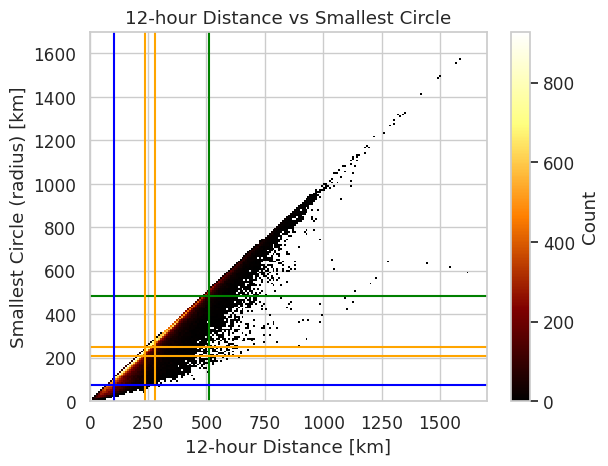

In [184]:
#Hist
sns.set(style='whitegrid', font_scale=1.1)
sns.histplot(circle12,x=circle12.all_dist_12hrs, y=circle12.all_dist_circle, cmap="afmhot", cbar=True, cbar_kws={'label': 'Count'}) #afmhot

# Labels and title
plt.xlabel('12-hour Distance [km]')
plt.ylabel('Smallest Circle (radius) [km]')
plt.title('12-hour Distance vs Smallest Circle')

# Axis limits
plt.xlim(0, 1700)
plt.ylim(0, 1700)

#Percentiles
plt.axvline(perc_90_12, color='green')
plt.axhline(perc_90_circle, color='green')
plt.axvline(perc_55_12, color='orange')
plt.axhline(perc_55_circle, color='orange')
plt.axvline(perc_45_12, color='orange')
plt.axhline(perc_45_circle, color='orange')
plt.axvline(perc_10_12, color='blue')
plt.axhline(perc_10_circle, color='blue')

plt.savefig(fig_dir + 'graph_12_circle.png', dpi=500)
plt.show()

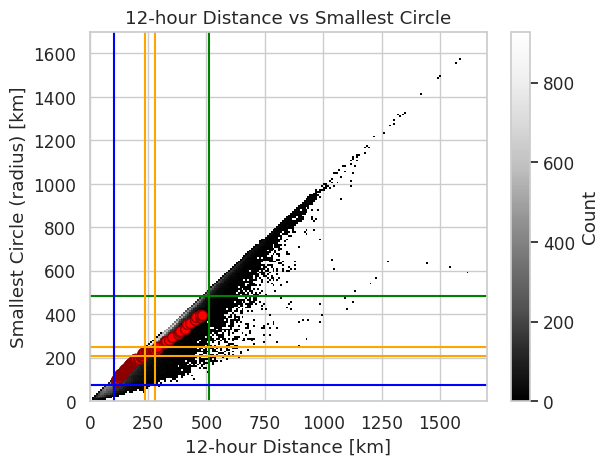

In [185]:
# Assuming df_QS and circle12 are correctly loaded and available
sns.set(style='whitegrid', font_scale=1.1)

# Create a 2D histogram using sns.histplot
sns.histplot(data=circle12, x='all_dist_12hrs', y='all_dist_circle', 
             cmap='Greys_r', cbar=True, cbar_kws={'label': 'Count'}) 

# Labels and title
plt.xlabel('12-hour Distance [km]')
plt.ylabel('Smallest Circle (radius) [km]')
plt.title('12-hour Distance vs Smallest Circle')

# Axis limits
plt.xlim(0, 1700)
plt.ylim(0, 1700)

# Get x and y values for id 409
# (or another id)
x = np.unique(df_QS[df_QS['id'] == 409]['AT_12h_DIST_v'])
y = np.unique(df_QS[df_QS['id'] == 409]['AT_CIRCLE_DIST_v'])

# Ensure x and y have the same length
#assert len(x) == len(y), "Arrays x and y must have the same length"

# Iterate over the x and y values to highlight each point
for i, (xi, yi) in enumerate(zip(x, y)):
    plt.scatter(xi, yi, color='red', s=50, edgecolors='darkred')
    
# Percentiles (assuming they are defined somewhere)
plt.axvline(perc_90_12, color='green')
plt.axhline(perc_90_circle, color='green')
plt.axvline(perc_55_12, color='orange')
plt.axhline(perc_55_circle, color='orange')
plt.axvline(perc_45_12, color='orange')
plt.axhline(perc_45_circle, color='orange')
plt.axvline(perc_10_12, color='blue')
plt.axhline(perc_10_circle, color='blue')

plt.savefig(fig_dir + 'graph_12_circle_409.png', dpi=500)

# Show the plot
plt.show()

## Radial Distance vs Smallest Circle

In [186]:
#Create dataframe with median velocities of smallest circle categories
circlerad = pd.DataFrame([all_dist_rad,all_dist_circle]).T
circlerad.columns = ['all_dist_rad','all_dist_circle']
circlerad

all_dist_rad  all_dist_circle
0        1554.441246       259.568671
1        1710.421483       279.077760
2        1779.948644       288.991963
3        1752.834779       290.526230
4        1687.237099       287.220648
...              ...              ...
145261    461.180215        77.731602
145262    494.613999        77.070482
145263    513.610282        75.870677
145264    472.738891        71.961023
145265    363.786099        63.492207

[145266 rows x 2 columns]

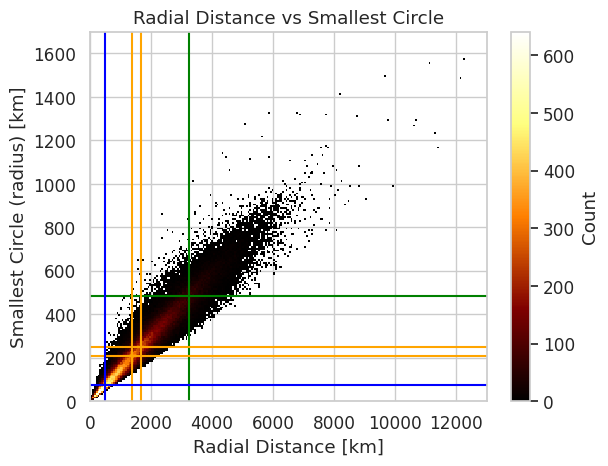

In [187]:
#Hist
sns.set(style='whitegrid', font_scale=1.1)
sns.histplot(circlerad,x=circlerad.all_dist_rad, y=circlerad.all_dist_circle, cmap="afmhot", cbar=True, cbar_kws={'label': 'Count'}) #afmhot

# Labels and title
plt.xlabel('Radial Distance [km]')
plt.ylabel('Smallest Circle (radius) [km]')
plt.title('Radial Distance vs Smallest Circle')

# Axis limits
plt.xlim(0, 13000)
plt.ylim(0, 1700)

#Percentiles
plt.axvline(perc_90_rad, color='green')
plt.axhline(perc_90_circle, color='green')
plt.axvline(perc_55_rad, color='orange')
plt.axhline(perc_55_circle, color='orange')
plt.axvline(perc_45_rad, color='orange')
plt.axhline(perc_45_circle, color='orange')
plt.axvline(perc_10_rad, color='blue')
plt.axhline(perc_10_circle, color='blue')

plt.savefig(fig_dir + 'graph_rad_circle.png', dpi=500)
plt.show()

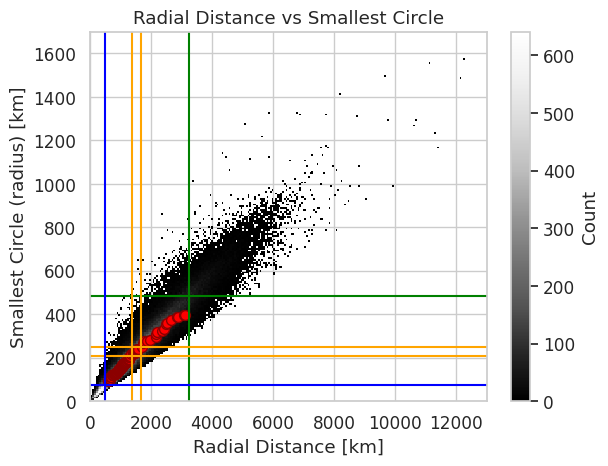

In [188]:
# Assuming df_QS and circlerad are correctly loaded and available
sns.set(style='whitegrid', font_scale=1.1)

# Create a 2D histogram using sns.histplot
sns.histplot(data=circlerad, x='all_dist_rad', y='all_dist_circle', 
             cmap='Greys_r', cbar=True, cbar_kws={'label': 'Count'}) 

# Labels and title
plt.xlabel('Radial Distance [km]')
plt.ylabel('Smallest Circle (radius) [km]')
plt.title('Radial Distance vs Smallest Circle')

# Axis limits
plt.xlim(0, 13000)
plt.ylim(0, 1700)

# Get x and y values for id 409 (or another id)
x = np.unique(df_QS[df_QS['id'] == 409]['AT_RAD_DIST_v'])
y = np.unique(df_QS[df_QS['id'] == 409]['AT_CIRCLE_DIST_v'])

# Ensure x and y have the same length
#assert len(x) == len(y), "Arrays x and y must have the same length"

# Iterate over the x and y values to highlight each point
for i, (xi, yi) in enumerate(zip(x, y)):
    plt.scatter(xi, yi, color='red', s=50, edgecolors='darkred')
    
# Percentiles (assuming they are defined somewhere)
plt.axvline(perc_90_rad, color='green')
plt.axhline(perc_90_circle, color='green')
plt.axvline(perc_55_rad, color='orange')
plt.axhline(perc_55_circle, color='orange')
plt.axvline(perc_45_rad, color='orange')
plt.axhline(perc_45_circle, color='orange')
plt.axvline(perc_10_rad, color='blue')
plt.axhline(perc_10_circle, color='blue')

plt.savefig(fig_dir + 'graph_12_rad_409.png', dpi=500)

# Show the plot
plt.show()